# ANALYZING THE EFFECTIVENESS OF CARBON PRICING ACROSS INDUSTRIES AND REGIONS

In [127]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
#Loading the dataset
data=pd.read_excel("C:/Users/Debolina Das/OneDrive/Desktop/Data science GP/OECD Data carbon prices.xlsx")
data.head(5)

,Reference area,Economic sector,Emissions source,PRICE_LEVEL,Carbon price level,TIME_PERIOD,%of emission priced,GDP(USD$),Population-Size,Effective Carbon rate,Total Emissions data,Income group
0,Norway,Electricity,Fossil fuels,BEN_EUR_TCO2E_120,EUR 120 per tonne of CO2e benchmark,2018,13.183599,4.397886e+11,2.798150e+05,13.238310,NaN,High income
1,Norway,Electricity,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,EUR 120 per tonne of CO2e benchmark,2012,3.656244,5.127773e+11,2.730840e+05,NaN,NaN,High income
2,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,EUR 60 per tonne of CO2e benchmark,2015,37.965591,7.757437e+11,2.778660e+05,NaN,0.0288,High income
3,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,EUR 60 per tonne of CO2e benchmark,2012,43.442249,8.456890e+11,2.730840e+05,NaN,0.0272,High income
4,Iceland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,EUR 30 per tonne of CO2e benchmark,2018,30.220245,2.626085e+10,4.807550e+09,23.158195,0.1015,High income


In [129]:
# Link For The Dataset


In [130]:
# Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Reference area         8217 non-null   object 
 1   Economic sector        8217 non-null   object 
 2   Emissions source       8217 non-null   object 
 3   PRICE_LEVEL            8217 non-null   object 
 4   Carbon price level     8217 non-null   object 
 5   TIME_PERIOD            8217 non-null   int64  
 6   %of emission priced    8217 non-null   float64
 7   GDP(USD$)              8067 non-null   float64
 8   Population-Size        8217 non-null   float64
 9   Effective Carbon rate  4659 non-null   float64
 10  Total Emissions data   6693 non-null   float64
 11  Income group           7647 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 770.5+ KB


In [131]:
# Ensure column names are correctly formatted
data.columns = data.columns.str.strip().str.upper().str.replace(" ", "_")

In [132]:
#Total null values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print(pd.DataFrame({'Missing Values': missing_values}))

                       Missing Values
REFERENCE_AREA                      0
ECONOMIC_SECTOR                     0
EMISSIONS_SOURCE                    0
PRICE_LEVEL                         0
CARBON_PRICE_LEVEL                  0
TIME_PERIOD                         0
%OF_EMISSION_PRICED                 0
GDP(USD$)                         150
POPULATION-SIZE                     0
EFFECTIVE_CARBON_RATE            3558
TOTAL_EMISSIONS_DATA             1524
INCOME_GROUP                      570


In [133]:
# Drop NA values from GDP and Total Emissions columns
data = data.dropna(subset=['GDP(USD$)', 'TOTAL_EMISSIONS_DATA','INCOME_GROUP'])

# Handle missing values in 'EFFECTIVE_CARBON_RATE' using the mean within each 'REFERENCE_AREA' group
data['EFFECTIVE_CARBON_RATE'] = data.groupby('REFERENCE_AREA')['EFFECTIVE_CARBON_RATE'].transform(
    lambda x: x.fillna(x.mean()) if not np.isnan(x.mean()) else x.fillna(data['EFFECTIVE_CARBON_RATE'].mean())
)

# Check if missing values are handled
print(data.isnull().sum())


REFERENCE_AREA           0
ECONOMIC_SECTOR          0
EMISSIONS_SOURCE         0
PRICE_LEVEL              0
CARBON_PRICE_LEVEL       0
TIME_PERIOD              0
%OF_EMISSION_PRICED      0
GDP(USD$)                0
POPULATION-SIZE          0
EFFECTIVE_CARBON_RATE    0
TOTAL_EMISSIONS_DATA     0
INCOME_GROUP             0
dtype: int64


# EXPLORATORY DATA ANALYSIS

In [134]:
# Set an approximate exchange rate (e.g., 1 USD = 0.92 EUR as of recent rates)
exchange_rate = 0.92

# Convert GDP from USD to EUR
data['GDP(EUR)'] = data['GDP(USD$)'] * exchange_rate

# Drop the original GDP(USD$) column
data.drop(columns=['GDP(USD$)'], inplace=True)

print(data.head())

  REFERENCE_AREA          ECONOMIC_SECTOR               EMISSIONS_SOURCE  \
2    Netherlands  Agriculture & fisheries                   Fossil fuels   
3    Netherlands  Agriculture & fisheries                   Fossil fuels   
4        Iceland                 Industry  Fossil fuels and biofuels CO2   
5        Finland                Buildings  Fossil fuels and biofuels CO2   
7        Ireland                 Industry  Fossil fuels and biofuels CO2   

         PRICE_LEVEL                   CARBON_PRICE_LEVEL  TIME_PERIOD  \
2   BEN_EUR_TCO2E_60   EUR 60 per tonne of CO2e benchmark         2015   
3   BEN_EUR_TCO2E_60   EUR 60 per tonne of CO2e benchmark         2012   
4   BEN_EUR_TCO2E_30   EUR 30 per tonne of CO2e benchmark         2018   
5  BEN_EUR_TCO2E_120  EUR 120 per tonne of CO2e benchmark         2018   
7  BEN_EUR_TCO2E_120  EUR 120 per tonne of CO2e benchmark         2015   

   %OF_EMISSION_PRICED  POPULATION-SIZE  EFFECTIVE_CARBON_RATE  \
2            37.965591     2.778

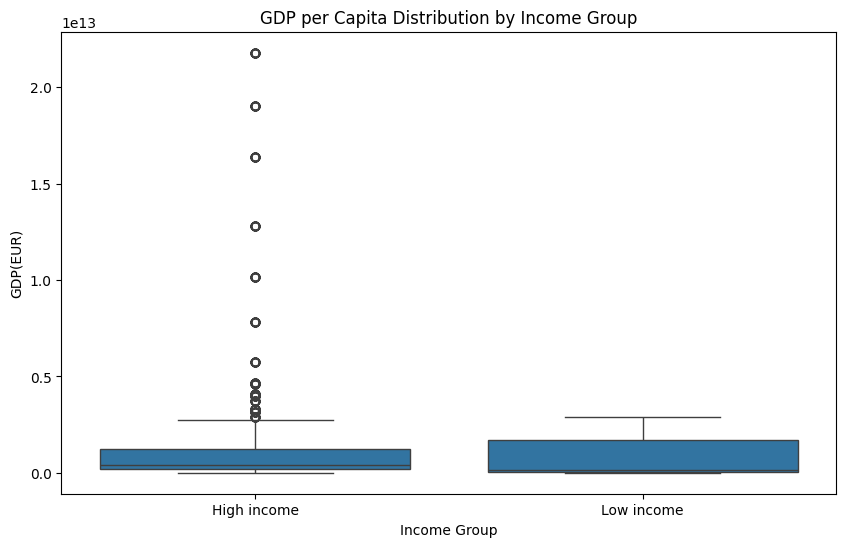

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="INCOME_GROUP", y="GDP(EUR)", data=data)
plt.title("GDP per Capita Distribution by Income Group")
plt.xlabel("Income Group")
plt.ylabel("GDP(EUR)")
plt.show()

The high income has a lot of outliers.

In [136]:
# Ensure there are no missing values in GDP and Population columns
data = data.dropna(subset=['GDP(EUR)', 'POPULATION-SIZE'])

# Calculate GDP per capita
data['GDP per capita (EUR)'] = data['GDP(EUR)'] / data['POPULATION-SIZE']

# Display the first few rows to check the results
print(data[['REFERENCE_AREA', 'GDP(EUR)', 'POPULATION-SIZE', 'GDP per capita (EUR)']].head())

  REFERENCE_AREA      GDP(EUR)  POPULATION-SIZE  GDP per capita (EUR)
2    Netherlands  7.136842e+11     2.778660e+05          2.568447e+06
3    Netherlands  7.780339e+11     2.730840e+05          2.849064e+06
4        Iceland  2.415998e+10     4.807550e+09          5.025425e+00
5        Finland  2.519597e+11     5.515525e+06          4.568191e+04
7        Ireland  2.782001e+11     1.062201e+09          2.619092e+02


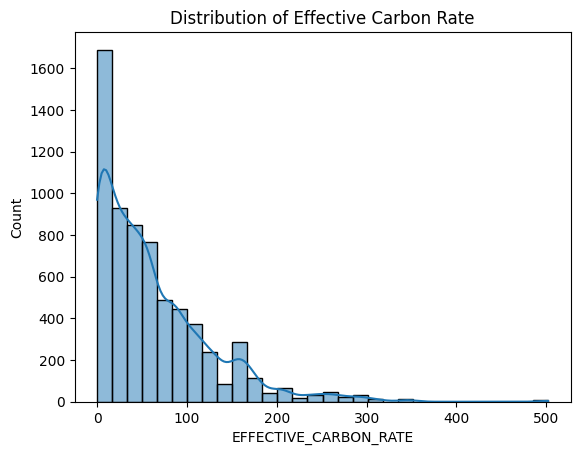

In [137]:
sns.histplot(data['EFFECTIVE_CARBON_RATE'].dropna(), kde=True, bins=30)
plt.title("Distribution of Effective Carbon Rate")
plt.show()

The histogram shows that the distribution of the Effective Carbon Rate is highly right-skewed, with most values concentrated near the lower end (close to zero) and fewer instances of high carbon rates. This suggests that a majority of emissions have relatively low effective carbon pricing.

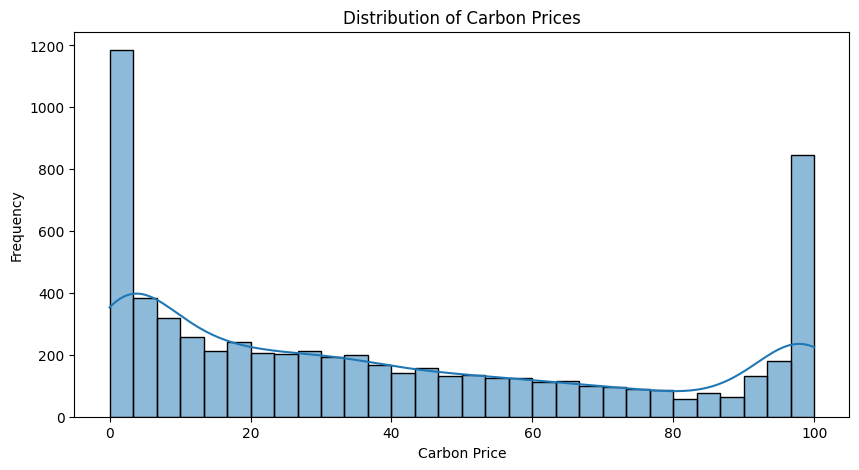

In [138]:
# Distribution of Carbon Prices
plt.figure(figsize=(10,5))
sns.histplot(data["%OF_EMISSION_PRICED"], bins=30, kde=True)
plt.title("Distribution of Carbon Prices")
plt.xlabel("Carbon Price")
plt.ylabel("Frequency")
plt.show()


The histogram reveals a heavily right-skewed distribution, indicating that most carbon prices are low, with a sharp peak at zero.The spike at 100 hints at possible capping or policy-driven price limits.

In [139]:
# Basic statistics
print("\nStatistical Summary:\n", data.describe())


Statistical Summary:
        TIME_PERIOD  %OF_EMISSION_PRICED  POPULATION-SIZE  \
count  6549.000000          6549.000000     6.549000e+03   
mean   2017.257902            40.147120     2.653624e+08   
std       3.437935            35.289418     8.251386e+08   
min    2012.000000             0.000000     3.289700e+04   
25%    2015.000000             7.382405     2.797920e+05   
50%    2018.000000            30.837362     8.380100e+06   
75%    2021.000000            69.553368     2.496326e+07   
max    2021.000000           100.000000     4.905899e+09   

       EFFECTIVE_CARBON_RATE  TOTAL_EMISSIONS_DATA      GDP(EUR)  \
count            6549.000000           6549.000000  6.549000e+03   
mean               62.299762             64.391012  1.250443e+12   
std                62.731891            229.145677  2.822176e+12   
min                 0.000000              0.000000  1.018374e+10   
25%                15.165855              1.973600  1.621139e+11   
50%                45.035412

In [140]:
data['GDP per capita (EUR)'].median()

56280.97057983725

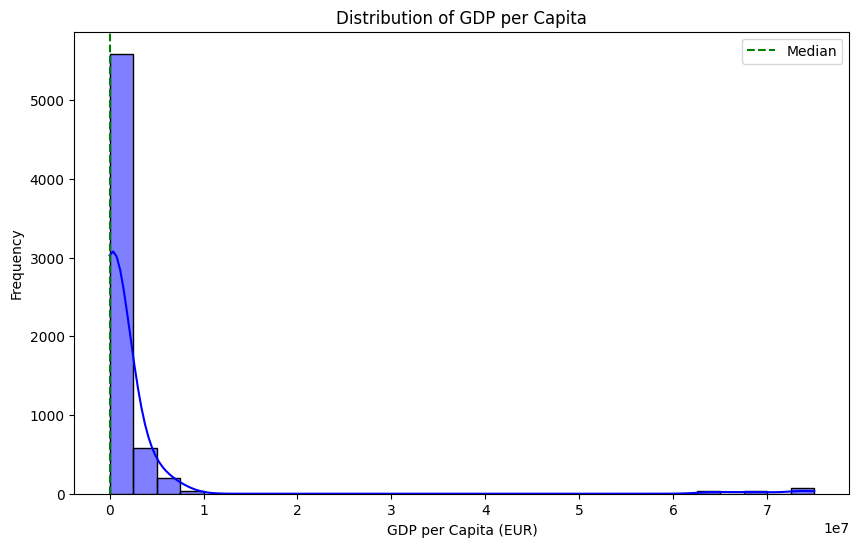

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot GDP per capita distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['GDP per capita (EUR)'], bins=30, kde=True, color='blue')

# Add vertical lines for mean and median
plt.axvline(data['GDP per capita (EUR)'].median(), color='green', linestyle='dashed', label='Median')

# Labels and legend
plt.xlabel('GDP per Capita (EUR)')
plt.ylabel('Frequency')
plt.title('Distribution of GDP per Capita')
plt.legend()
plt.show()


The histogram shows that GDP per capita (EUR) is highly right-skewed, meaning most countries or regions have relatively low GDP per capita, while a few have extremely high values.

In [142]:
# Aggregate by country using the mean Effective Carbon Rate
country_avg = (
    data.groupby("REFERENCE_AREA", as_index=False)["EFFECTIVE_CARBON_RATE"]
    .mean()
)

# Get the top 10 unique countries
top_countries = country_avg.nlargest(10, "EFFECTIVE_CARBON_RATE")

# Get the bottom 10 unique countries
bottom_countries = country_avg.nsmallest(10, "EFFECTIVE_CARBON_RATE")

print("Top 10 Countries by Average Effective Carbon Rate:")
print(top_countries)

print("\nBottom 10 Countries by Average Effective Carbon Rate:")
print(bottom_countries)

Top 10 Countries by Average Effective Carbon Rate:
   REFERENCE_AREA  EFFECTIVE_CARBON_RATE
30         Israel             179.287618
43    Netherlands             164.813207
61    Switzerland             158.877318
60         Sweden             151.560495
19        Finland             131.004307
46         Norway             128.690232
26        Iceland             117.096072
20         France             110.892764
14        Denmark             109.165357
52       Portugal              99.973996

Bottom 10 Countries by Average Effective Carbon Rate:
   REFERENCE_AREA  EFFECTIVE_CARBON_RATE
3      Bangladesh               0.000000
16        Ecuador               0.000000
40       Malaysia               0.000000
45        Nigeria               0.000000
5          Brazil               0.204403
28      Indonesia               0.316835
6    Burkina Faso               1.348064
63        Ukraine               1.414571
59      Sri Lanka               3.881175
34     Kazakhstan               4

C:\Users\Debolina Das\AppData\Local\Temp\ipykernel_33820\3408384700.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries_df, x="EFFECTIVE_CARBON_RATE", y="REFERENCE_AREA", palette="Greens_r")


<Figure size 1400x600 with 0 Axes>

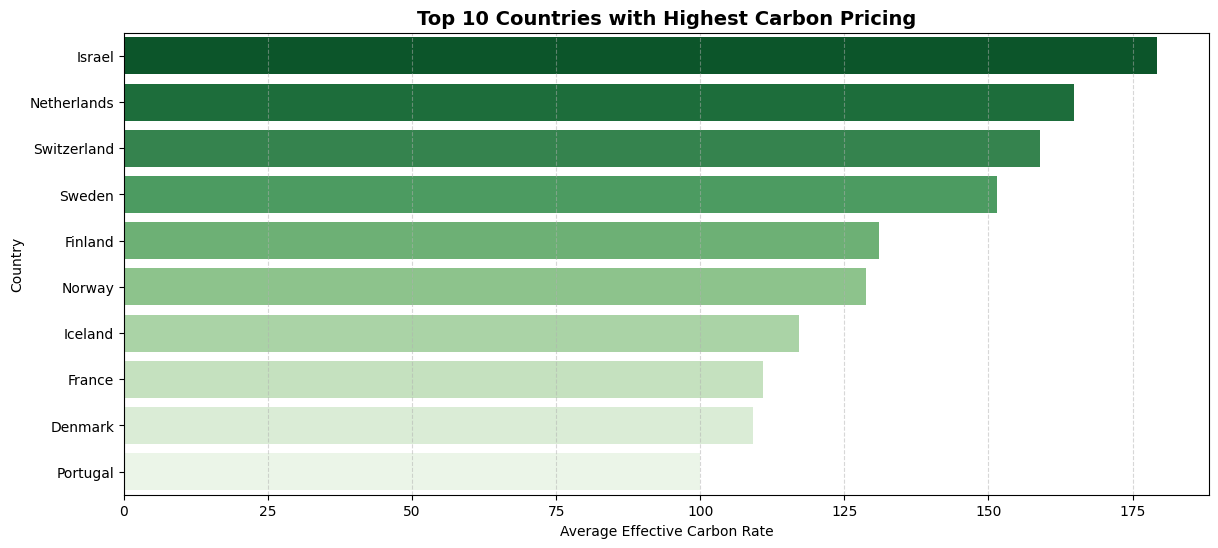

In [143]:
# Top 10 Countries with Highest Carbon Pricing
top_countries_df = top_countries.reset_index()
bottom_countries_df = bottom_countries.reset_index()

plt.figure(figsize=(14,6))

# Plot the top 10 countries
plt.figure(figsize=(14,6))
sns.barplot(data=top_countries_df, x="EFFECTIVE_CARBON_RATE", y="REFERENCE_AREA", palette="Greens_r")
plt.title("Top 10 Countries with Highest Carbon Pricing", fontsize=14, fontweight="bold")
plt.xlabel("Average Effective Carbon Rate")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()



The output lists the top 10 countries with the highest carbon pricing, indicating their commitment to reducing carbon emissions through economic measures. The countries, in order, are Israel, Netherlands, Switzerland, Sweden, Finland, Norway, Iceland, France, Denmark, and Portugal. The "Average Effective Carbon Rate" scale ranges from 0 to 175, suggesting significant variation in carbon pricing strategies among these nations. This highlights the global effort to combat climate change by incentivizing lower carbon emissions through financial mechanisms.

C:\Users\Debolina Das\AppData\Local\Temp\ipykernel_33820\744576015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_countries_df, x="EFFECTIVE_CARBON_RATE", y="REFERENCE_AREA", palette="Reds_r")


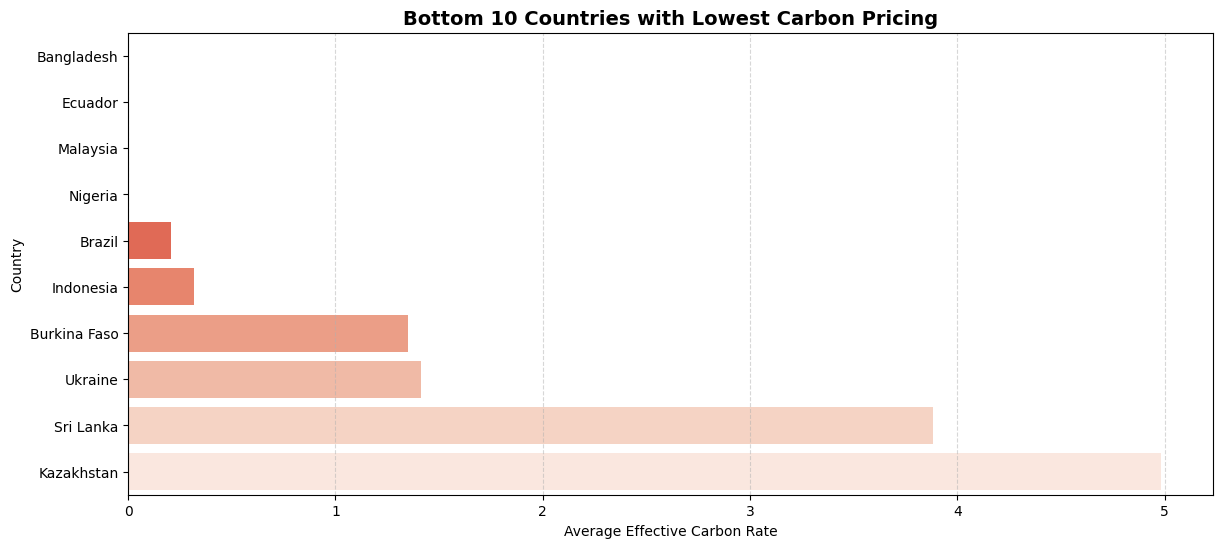

In [144]:
# Plot the bottom 10 countries
plt.figure(figsize=(14,6))
sns.barplot(data=bottom_countries_df, x="EFFECTIVE_CARBON_RATE", y="REFERENCE_AREA", palette="Reds_r")
plt.title("Bottom 10 Countries with Lowest Carbon Pricing", fontsize=14, fontweight="bold")
plt.xlabel("Average Effective Carbon Rate")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

The output highlights the bottom 10 countries with the lowest carbon pricing, indicating limited economic measures to reduce carbon emissions. The countries listed are Bangladesh, Ecuador, Malaysia, Nigeria, Brazil, Indonesia, Burkina Faso, Ukraine, Sri Lanka, and Kazakhstan. The "Average Effective Carbon Rate" scale ranges from 0 to 5, showing minimal carbon pricing efforts in these nations. This suggests a need for stronger policies to address climate change and incentivize lower carbon emissions in these regions.

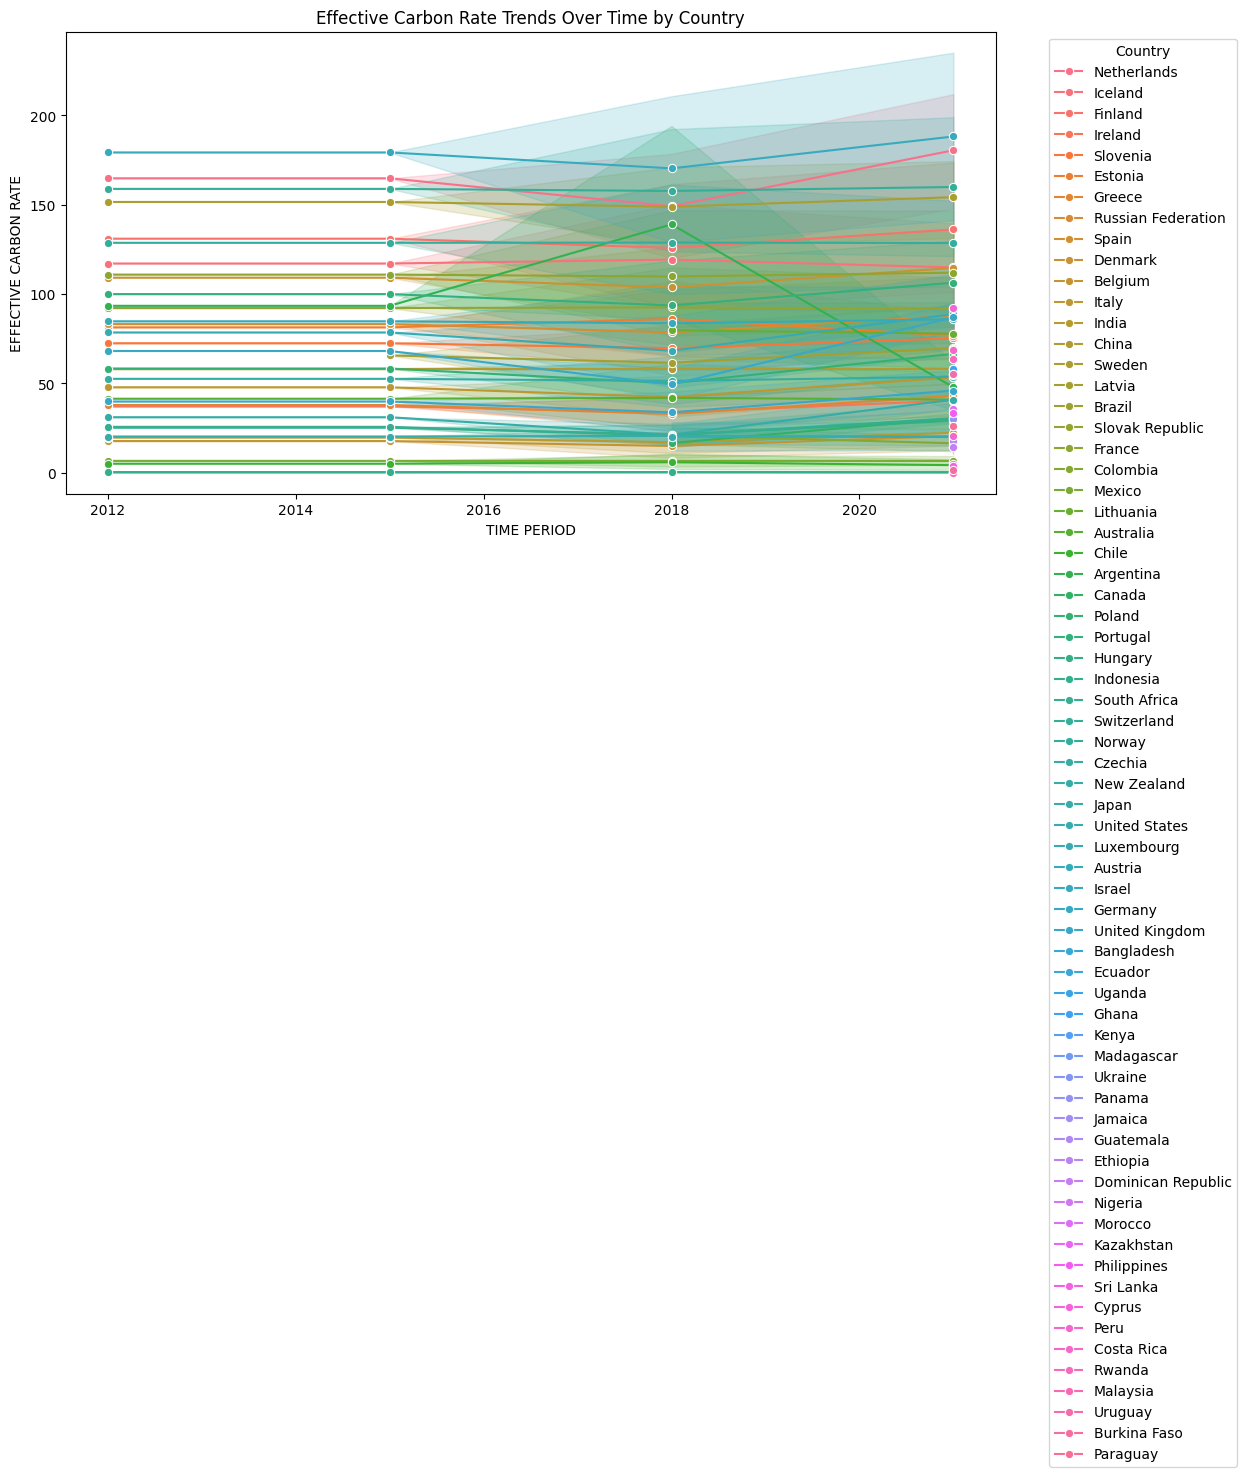

In [145]:
# Time Series Analysis of Carbon Pricing Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x="TIME_PERIOD", y="EFFECTIVE_CARBON_RATE", hue="REFERENCE_AREA", data=data, marker="o")
plt.title("Effective Carbon Rate Trends Over Time by Country")
plt.xlabel("TIME PERIOD")
plt.ylabel("EFFECTIVE CARBON RATE")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The output depicts the trends of effective carbon rate in different countries over time. Many countries show an upward trend in the effective carbon rate indicating a growing commitment to reducing carbon pricing while others show a stagnant or minimal trend.

There is a noticeable disparity in carbon pricing efforts between developed and developing nations, with developed countries generally having higher effective carbon rates.

In [146]:
income_mapping = {'Low income': 1, 'High income': 2}
data['INCOME_GROUP_NUMERIC'] = data['INCOME_GROUP'].map(income_mapping)


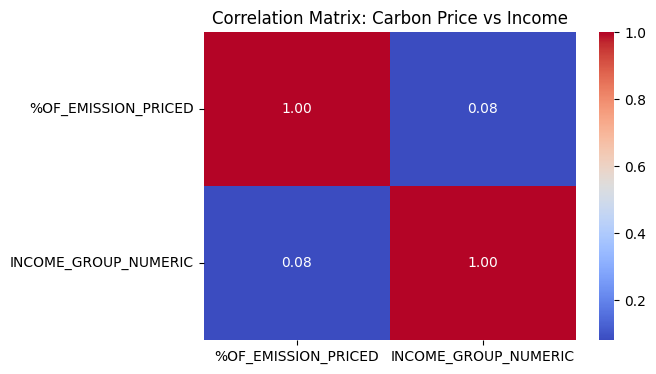

In [147]:
df = data[['%OF_EMISSION_PRICED', 'INCOME_GROUP_NUMERIC']]
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Carbon Price vs Income")
plt.show()

The above output depicts that there is a weak relationship

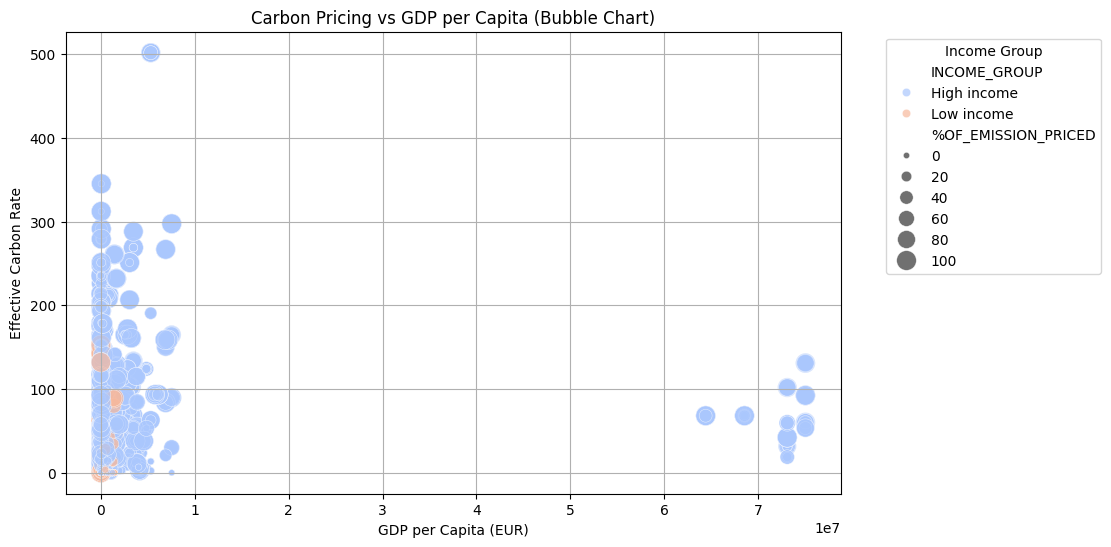

In [148]:
# Carbon Pricing vs GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GDP per capita (EUR)", y="EFFECTIVE_CARBON_RATE", size="%OF_EMISSION_PRICED",
                hue="INCOME_GROUP", data=data, alpha=0.7, palette="coolwarm", sizes=(20, 200))
plt.title("Carbon Pricing vs GDP per Capita (Bubble Chart)")
plt.xlabel("GDP per Capita (EUR)")
plt.ylabel("Effective Carbon Rate")
plt.legend(title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


The graph shows that countries with higher GDP per capita generally have a higher effective carbon rate, but most data points are clustered at lower GDP levels with varying carbon prices. Additionally, high-income countries tend to have larger bubbles, indicating a higher percentage of emissions being priced.

C:\Users\Debolina Das\AppData\Local\Temp\ipykernel_33820\3787185337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index[:15], y=region_avg.values[:15], palette="viridis")


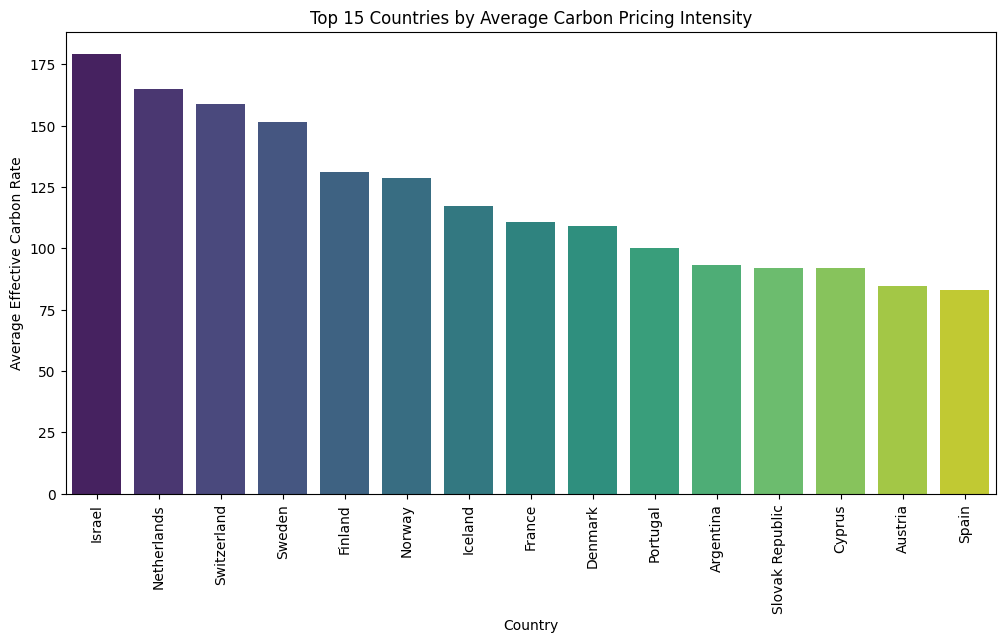

In [149]:
# Top 15 Countries by Average Carbon Pricing Intensity
plt.figure(figsize=(12, 6))
region_avg = data.groupby("REFERENCE_AREA")["EFFECTIVE_CARBON_RATE"].mean().sort_values(ascending=False)
sns.barplot(x=region_avg.index[:15], y=region_avg.values[:15], palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 15 Countries by Average Carbon Pricing Intensity")
plt.xlabel("Country")
plt.ylabel("Average Effective Carbon Rate")
plt.show()


The bar chart shows the top 15 countries with the highest average effective carbon pricing intensity. Israel has the highest carbon pricing, followed by the Netherlands and Switzerland. European countries dominate the list, indicating stronger carbon pricing policies in the region. Some non-European countries like Argentina also appear, suggesting emerging carbon pricing initiatives.

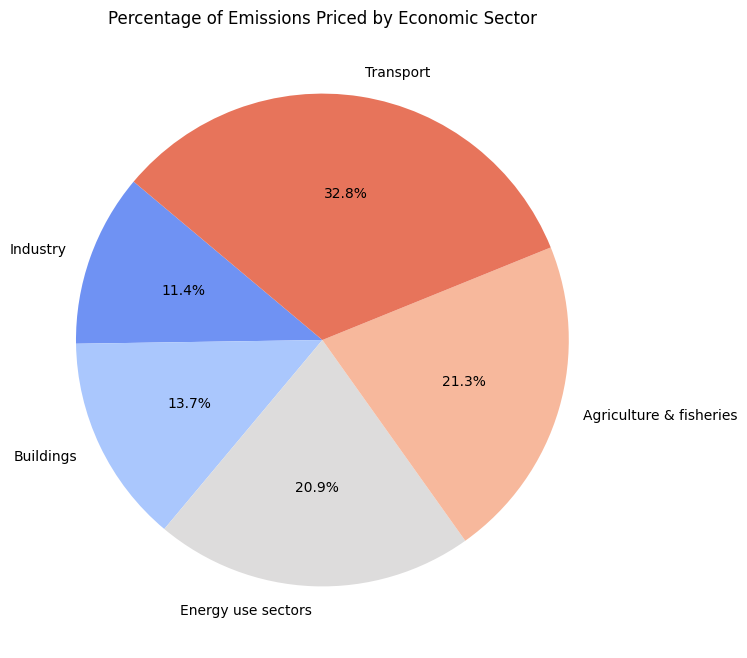

In [150]:
# Percentage of Emissions Priced by Economic Sector
sector_pricing = data.groupby("ECONOMIC_SECTOR")["%OF_EMISSION_PRICED"].mean().sort_values()
plt.figure(figsize=(8, 8))
plt.pie(sector_pricing, labels=sector_pricing.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("coolwarm", len(sector_pricing)))
plt.title("Percentage of Emissions Priced by Economic Sector")
plt.show()


The pie chart shows the percentage of emissions priced across different economic sectors. The transport sector has the highest share (32.8%), indicating strong carbon pricing policies in this area. Agriculture & fisheries (21.3%) and buildings (20.9%) also have significant pricing coverage.
However, industry has the lowest share (11.4%), suggesting weaker carbon pricing enforcement in this sector.

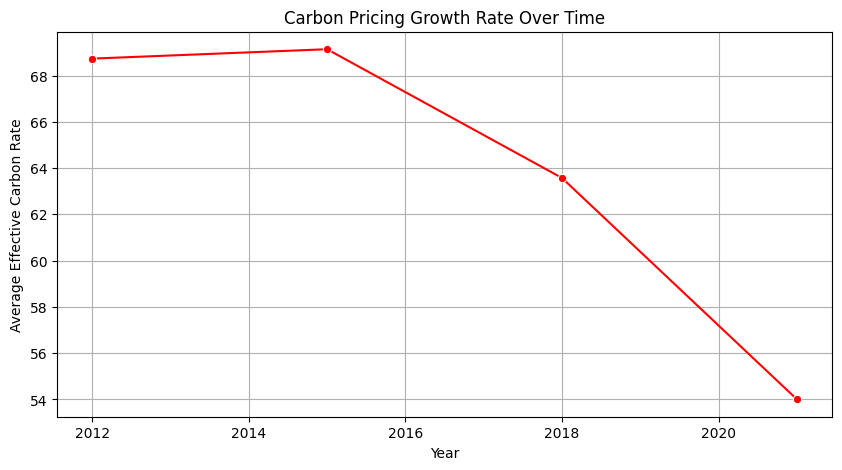

In [151]:
# Carbon Pricing Growth Rate Over Time
plt.figure(figsize=(10, 5))
data_grouped = data.groupby("TIME_PERIOD")["EFFECTIVE_CARBON_RATE"].mean()
sns.lineplot(x=data_grouped.index, y=data_grouped.values, marker="o", color="red")
plt.title("Carbon Pricing Growth Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Average Effective Carbon Rate")
plt.grid()
plt.show()


The graph indicates a sharp decline in the average effective carbon rate after 2016, suggesting a significant weakening or reduction in carbon pricing policies during that period, with no clear recovery in the following years.

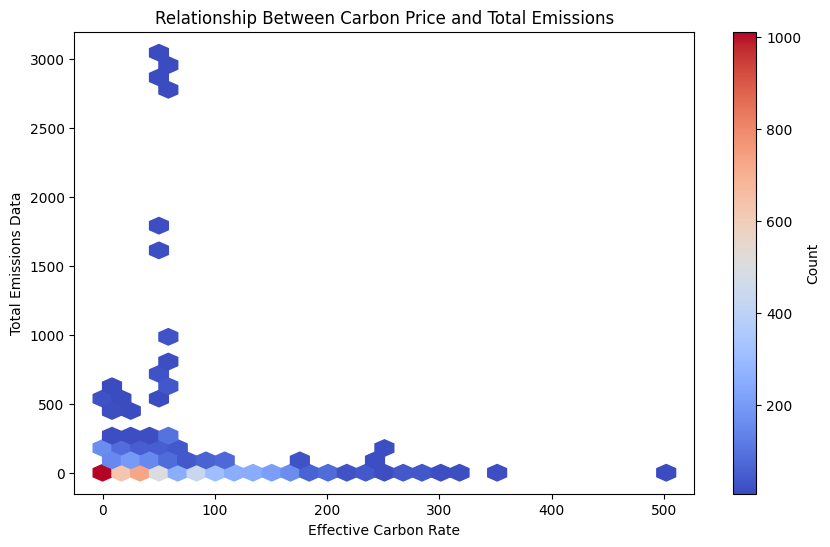

In [152]:
# Relationship Between Carbon Price and Total Emissions
plt.figure(figsize=(10, 6))
plt.hexbin(data["EFFECTIVE_CARBON_RATE"], data["TOTAL_EMISSIONS_DATA"], gridsize=30, cmap="coolwarm", mincnt=1)
plt.colorbar(label="Count")
plt.xlabel("Effective Carbon Rate")
plt.ylabel("Total Emissions Data")
plt.title("Relationship Between Carbon Price and Total Emissions")
plt.show()


The hexbin plot shows that most countries/sectors operate with very low effective carbon rates, often near zero, while still emitting significant amounts of CO₂. This clustering highlights a major gap in global carbon pricing coverage. Even where carbon prices are present, they are rarely high enough to drive meaningful emission reductions. Only a handful of outliers exhibit higher pricing, and they do not show clear evidence of lower emissions. This suggests that carbon pricing policies remain fragmented, unevenly applied, and in many cases, too weak to shift emissions trends significantly.

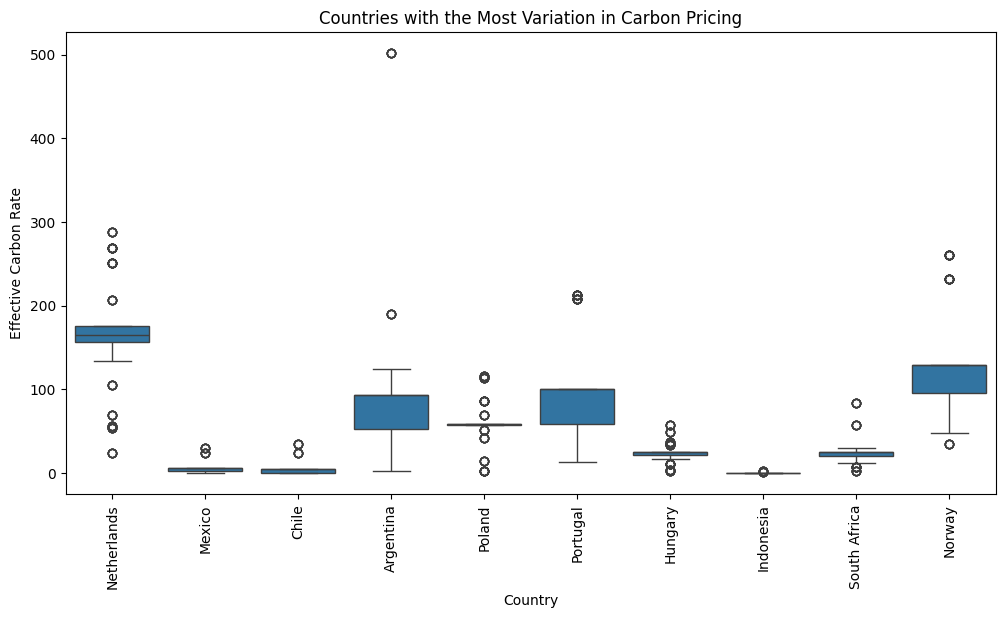

In [153]:
# Countries with the Most Variation in Carbon Pricing
plt.figure(figsize=(12, 6))
top_countries = data["REFERENCE_AREA"].value_counts().index[:10]  # Select top 10 most frequent countries
sns.boxplot(x="REFERENCE_AREA", y="EFFECTIVE_CARBON_RATE", data=data[data["REFERENCE_AREA"].isin(top_countries)])
plt.xticks(rotation=90)
plt.title("Countries with the Most Variation in Carbon Pricing")
plt.xlabel("Country")
plt.ylabel("Effective Carbon Rate")
plt.show()


Carbon pricing across the top emitting countries remains highly fragmented, with significant volatility and outliers reflecting ongoing policy experimentation, economic shocks, and sector-specific pricing mechanisms. While some countries demonstrate stable and predictable carbon pricing, others show extreme swings, highlighting the need for greater policy consistency if global carbon markets are to converge.

# **FEATURE ENGINEERING**

In [154]:
data["CARBON_PRICING_IMPACT"] = data["%OF_EMISSION_PRICED"] / data["GDP(EUR)"]
data["CARBON_PRICING_IMPACT"]

2       5.319663e-11
3       5.583593e-11
4       1.250839e-09
5       8.834373e-11
7       3.225865e-11
            ...     
8211    1.439768e-09
8212    1.549627e-11
8213    4.916596e-11
8214    4.452168e-12
8216    2.157721e-10
Name: CARBON_PRICING_IMPACT, Length: 6549, dtype: float64

In [155]:
data["EMISSIONS_PER_CAPITA"] = data["TOTAL_EMISSIONS_DATA"] / data["POPULATION-SIZE"]
data["EMISSIONS_PER_CAPITA"]

2       1.036471e-07
3       9.960305e-08
4       2.111262e-11
5       7.131506e-07
7       3.413574e-09
            ...     
8211    1.124489e-06
8212    1.384455e-06
8213    5.724497e-05
8214    6.779179e-07
8216    4.520144e-06
Name: EMISSIONS_PER_CAPITA, Length: 6549, dtype: float64

In [156]:
data["CARBON_EFFICIENCY_SCORE"] = data["EFFECTIVE_CARBON_RATE"] / data["TOTAL_EMISSIONS_DATA"]
data["CARBON_EFFICIENCY_SCORE"]

2       5722.680781
3       6059.309063
4        228.159557
5          8.768626
7         10.225234
           ...     
8211      12.269856
8212       0.669262
8213       0.873954
8214       0.060778
8216      22.964076
Name: CARBON_EFFICIENCY_SCORE, Length: 6549, dtype: float64

In [157]:
data["CARBON_RATE_CHANGE"] = data.groupby("REFERENCE_AREA")["EFFECTIVE_CARBON_RATE"].pct_change() * 100
data["CARBON_RATE_CHANGE"]

2             NaN
3        0.000000
4             NaN
5             NaN
7             NaN
          ...    
8211    24.601184
8212     5.717778
8213   -54.906890
8214     0.000000
8216   -19.234532
Name: CARBON_RATE_CHANGE, Length: 6549, dtype: float64

In [158]:
bins = [0, 10, 50, 100, data["EFFECTIVE_CARBON_RATE"].max()]
labels = ["Low", "Moderate", "High", "Very High"]
data["CARBON_PRICE_CATEGORY"] = pd.cut(data["EFFECTIVE_CARBON_RATE"], bins=bins, labels=labels)


In [159]:
#Emissions Intensity & Effective Carbon Rate per GDP
data['Emissions_Intensity'] = data['TOTAL_EMISSIONS_DATA'] / data['GDP per capita (EUR)']
data['Carbon_Rate_per_GDP'] = data['EFFECTIVE_CARBON_RATE'] / data['GDP per capita (EUR)']


In [160]:
# Calculate actual emissions that are priced
data['Actual_Emissions_Priced'] = (data['%OF_EMISSION_PRICED'] / 100) * data['TOTAL_EMISSIONS_DATA']

# Display updated dataframe
print(data[['%OF_EMISSION_PRICED', 'TOTAL_EMISSIONS_DATA', 'Actual_Emissions_Priced']].head())


   %OF_EMISSION_PRICED  TOTAL_EMISSIONS_DATA  Actual_Emissions_Priced
2            37.965591                0.0288                 0.010934
3            43.442249                0.0272                 0.011816
4            30.220245                0.1015                 0.030674
5            22.259062                3.9334                 0.875538
7             8.974361                3.6259                 0.325401


In [161]:
# Calculate the actual price paid by each country
data['Actual_Price_Paid'] = data['EFFECTIVE_CARBON_RATE'] * data['Actual_Emissions_Priced']
data.head()

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,INCOME_GROUP_NUMERIC,CARBON_PRICING_IMPACT,EMISSIONS_PER_CAPITA,CARBON_EFFICIENCY_SCORE,CARBON_RATE_CHANGE,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid
2,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,EUR 60 per tonne of CO2e benchmark,2015,37.965591,2.778660e+05,164.813207,0.0288,...,2,5.319663e-11,1.036471e-07,5722.680781,NaN,Very High,1.121300e-08,0.000064,0.010934,1.802082
3,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,EUR 60 per tonne of CO2e benchmark,2012,43.442249,2.730840e+05,164.813207,0.0272,...,2,5.583593e-11,9.960305e-08,6059.309063,0.0,Very High,9.546994e-09,0.000058,0.011816,1.947481
4,Iceland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,EUR 30 per tonne of CO2e benchmark,2018,30.220245,4.807550e+09,23.158195,0.1015,...,2,1.250839e-09,2.111262e-11,228.159557,NaN,Moderate,2.019730e-02,4.608207,0.030674,0.710344
5,Finland,Buildings,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,EUR 120 per tonne of CO2e benchmark,2018,22.259062,5.515525e+06,34.490513,3.9334,...,2,8.834373e-11,7.131506e-07,8.768626,NaN,Moderate,8.610411e-05,0.000755,0.875538,30.197753
7,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,EUR 120 per tonne of CO2e benchmark,2015,8.974361,1.062201e+09,37.075676,3.6259,...,2,3.225865e-11,3.413574e-09,10.225234,NaN,Moderate,1.384411e-02,0.141559,0.325401,12.064476


In [162]:
#data["CARBON_PRICE_LEVEL"] = data["CARBON_PRICE_LEVEL"].apply(lambda x: int(x.split()[1]))
#data.head(5)

In [163]:
def extract_price_level(val):
    try:
        parts = str(val).split()
        if len(parts) > 1 and parts[1].isdigit():
            return int(parts[1])
        elif parts[0].isdigit():
            return int(parts[0])
    except Exception:
        return None  # or np.nan
    return None

data["CARBON_PRICE_LEVEL"] = data["CARBON_PRICE_LEVEL"].apply(extract_price_level)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 2 to 8216
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   REFERENCE_AREA           6549 non-null   object  
 1   ECONOMIC_SECTOR          6549 non-null   object  
 2   EMISSIONS_SOURCE         6549 non-null   object  
 3   PRICE_LEVEL              6549 non-null   object  
 4   CARBON_PRICE_LEVEL       6549 non-null   int64   
 5   TIME_PERIOD              6549 non-null   int64   
 6   %OF_EMISSION_PRICED      6549 non-null   float64 
 7   POPULATION-SIZE          6549 non-null   float64 
 8   EFFECTIVE_CARBON_RATE    6549 non-null   float64 
 9   TOTAL_EMISSIONS_DATA     6549 non-null   float64 
 10  INCOME_GROUP             6549 non-null   object  
 11  GDP(EUR)                 6549 non-null   float64 
 12  GDP per capita (EUR)     6549 non-null   float64 
 13  INCOME_GROUP_NUMERIC     6549 non-null   int64   
 14  CARBON_PRICIN

In [165]:
missing_values = data.isnull().sum()
missing_values

REFERENCE_AREA               0
ECONOMIC_SECTOR              0
EMISSIONS_SOURCE             0
PRICE_LEVEL                  0
CARBON_PRICE_LEVEL           0
TIME_PERIOD                  0
%OF_EMISSION_PRICED          0
POPULATION-SIZE              0
EFFECTIVE_CARBON_RATE        0
TOTAL_EMISSIONS_DATA         0
INCOME_GROUP                 0
GDP(EUR)                     0
GDP per capita (EUR)         0
INCOME_GROUP_NUMERIC         0
CARBON_PRICING_IMPACT        0
EMISSIONS_PER_CAPITA         0
CARBON_EFFICIENCY_SCORE     12
CARBON_RATE_CHANGE         301
CARBON_PRICE_CATEGORY      387
Emissions_Intensity          0
Carbon_Rate_per_GDP          0
Actual_Emissions_Priced      0
Actual_Price_Paid            0
dtype: int64

In [166]:
data=data.dropna(subset=["CARBON_PRICE_CATEGORY"])
# Fill missing values with the median for numeric columns only
data.fillna(data.select_dtypes(include=['number']).median(), inplace=True)

print(data.isnull().sum())

REFERENCE_AREA             0
ECONOMIC_SECTOR            0
EMISSIONS_SOURCE           0
PRICE_LEVEL                0
CARBON_PRICE_LEVEL         0
TIME_PERIOD                0
%OF_EMISSION_PRICED        0
POPULATION-SIZE            0
EFFECTIVE_CARBON_RATE      0
TOTAL_EMISSIONS_DATA       0
INCOME_GROUP               0
GDP(EUR)                   0
GDP per capita (EUR)       0
INCOME_GROUP_NUMERIC       0
CARBON_PRICING_IMPACT      0
EMISSIONS_PER_CAPITA       0
CARBON_EFFICIENCY_SCORE    0
CARBON_RATE_CHANGE         0
CARBON_PRICE_CATEGORY      0
Emissions_Intensity        0
Carbon_Rate_per_GDP        0
Actual_Emissions_Priced    0
Actual_Price_Paid          0
dtype: int64


In [167]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables (e.g., Carbon Price Category, Income Group)
data['CARBON_PRICE_CATEGORY'] = LabelEncoder().fit_transform(data['CARBON_PRICE_CATEGORY'])
data.head(5)

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,INCOME_GROUP_NUMERIC,CARBON_PRICING_IMPACT,EMISSIONS_PER_CAPITA,CARBON_EFFICIENCY_SCORE,CARBON_RATE_CHANGE,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid
2,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,60,2015,37.965591,2.778660e+05,164.813207,0.0288,...,2,5.319663e-11,1.036471e-07,5722.680781,0.0,3,1.121300e-08,0.000064,0.010934,1.802082
3,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,43.442249,2.730840e+05,164.813207,0.0272,...,2,5.583593e-11,9.960305e-08,6059.309063,0.0,3,9.546994e-09,0.000058,0.011816,1.947481
4,Iceland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,30,2018,30.220245,4.807550e+09,23.158195,0.1015,...,2,1.250839e-09,2.111262e-11,228.159557,0.0,2,2.019730e-02,4.608207,0.030674,0.710344
5,Finland,Buildings,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2018,22.259062,5.515525e+06,34.490513,3.9334,...,2,8.834373e-11,7.131506e-07,8.768626,0.0,2,8.610411e-05,0.000755,0.875538,30.197753
7,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2015,8.974361,1.062201e+09,37.075676,3.6259,...,2,3.225865e-11,3.413574e-09,10.225234,0.0,2,1.384411e-02,0.141559,0.325401,12.064476


In [168]:
# Define economic growth rate as a derived feature (Assume GDP data is available externally)
data['GDP Growth Rate'] = data.groupby('REFERENCE_AREA')['GDP(EUR)'].pct_change() * 100
data.head(5)

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,CARBON_PRICING_IMPACT,EMISSIONS_PER_CAPITA,CARBON_EFFICIENCY_SCORE,CARBON_RATE_CHANGE,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid,GDP Growth Rate
2,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,60,2015,37.965591,2.778660e+05,164.813207,0.0288,...,5.319663e-11,1.036471e-07,5722.680781,0.0,3,1.121300e-08,0.000064,0.010934,1.802082,NaN
3,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,43.442249,2.730840e+05,164.813207,0.0272,...,5.583593e-11,9.960305e-08,6059.309063,0.0,3,9.546994e-09,0.000058,0.011816,1.947481,9.016553
4,Iceland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,30,2018,30.220245,4.807550e+09,23.158195,0.1015,...,1.250839e-09,2.111262e-11,228.159557,0.0,2,2.019730e-02,4.608207,0.030674,0.710344,NaN
5,Finland,Buildings,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2018,22.259062,5.515525e+06,34.490513,3.9334,...,8.834373e-11,7.131506e-07,8.768626,0.0,2,8.610411e-05,0.000755,0.875538,30.197753,NaN
7,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2015,8.974361,1.062201e+09,37.075676,3.6259,...,3.225865e-11,3.413574e-09,10.225234,0.0,2,1.384411e-02,0.141559,0.325401,12.064476,NaN


In [169]:
# Drop rows with missing GDP growth rate
data.dropna(subset=['GDP Growth Rate'], inplace=True)

# Define independent variables
X = data[['CARBON_PRICE_CATEGORY',
        'Carbon_Rate_per_GDP','Actual_Emissions_Priced']]

# Define target variable
y = data['GDP Growth Rate']

# Check dataset after preprocessing
print(data.head())

   REFERENCE_AREA          ECONOMIC_SECTOR               EMISSIONS_SOURCE  \
3     Netherlands  Agriculture & fisheries                   Fossil fuels   
8         Ireland                 Industry  Fossil fuels and biofuels CO2   
9         Ireland                 Industry  Fossil fuels and biofuels CO2   
11       Slovenia       Energy use sectors                   Fossil fuels   
12       Slovenia       Energy use sectors                   Fossil fuels   

          PRICE_LEVEL  CARBON_PRICE_LEVEL  TIME_PERIOD  %OF_EMISSION_PRICED  \
3    BEN_EUR_TCO2E_60                  60         2012            43.442249   
8   BEN_EUR_TCO2E_120                 120         2012            15.950274   
9   BEN_EUR_TCO2E_120                 120         2021            31.208641   
11   BEN_EUR_TCO2E_60                  60         2012            53.187443   
12   BEN_EUR_TCO2E_60                  60         2021            89.590881   

    POPULATION-SIZE  EFFECTIVE_CARBON_RATE  TOTAL_EMISSIONS_DA

In [170]:
print(data.isnull().sum())

REFERENCE_AREA             0
ECONOMIC_SECTOR            0
EMISSIONS_SOURCE           0
PRICE_LEVEL                0
CARBON_PRICE_LEVEL         0
TIME_PERIOD                0
%OF_EMISSION_PRICED        0
POPULATION-SIZE            0
EFFECTIVE_CARBON_RATE      0
TOTAL_EMISSIONS_DATA       0
INCOME_GROUP               0
GDP(EUR)                   0
GDP per capita (EUR)       0
INCOME_GROUP_NUMERIC       0
CARBON_PRICING_IMPACT      0
EMISSIONS_PER_CAPITA       0
CARBON_EFFICIENCY_SCORE    0
CARBON_RATE_CHANGE         0
CARBON_PRICE_CATEGORY      0
Emissions_Intensity        0
Carbon_Rate_per_GDP        0
Actual_Emissions_Priced    0
Actual_Price_Paid          0
GDP Growth Rate            0
dtype: int64


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [172]:
#Checking NA values in training datasset
print(X_train.isnull().sum())
print(y_train.isnull().sum())

CARBON_PRICE_CATEGORY      0
Carbon_Rate_per_GDP        0
Actual_Emissions_Priced    0
dtype: int64
0


In [173]:
#Checking infinite values in training data set
print("Any infinite values in X_train?", np.isinf(X_train).sum().sum())
print("Any infinite values in y_train?", np.isinf(y_train).sum().sum())

Any infinite values in X_train? 0
Any infinite values in y_train? 0


In [174]:
#Replace inf values with NaN, then fill:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [175]:
#Checking the values
print("After cleaning, any NaN in X_train?", X_train.isnull().sum().sum())
print("After cleaning, any NaN in y_train?", y_train.isnull().sum().sum())

print("After cleaning, any inf in X_train?", np.isinf(X_train).sum().sum())
print("After cleaning, any inf in y_train?", np.isinf(y_train).sum().sum())

After cleaning, any NaN in X_train? 0
After cleaning, any NaN in y_train? 0
After cleaning, any inf in X_train? 0
After cleaning, any inf in y_train? 0


In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame of independent variables (excluding the dependent variable)
X_train_vif = sm.add_constant(X_train)  # Add constant term for VIF computation

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Display VIF results
print(vif_data)

                   Feature       VIF
0                    const  3.013683
1    CARBON_PRICE_CATEGORY  1.037395
2      Carbon_Rate_per_GDP  1.025792
3  Actual_Emissions_Priced  1.013877


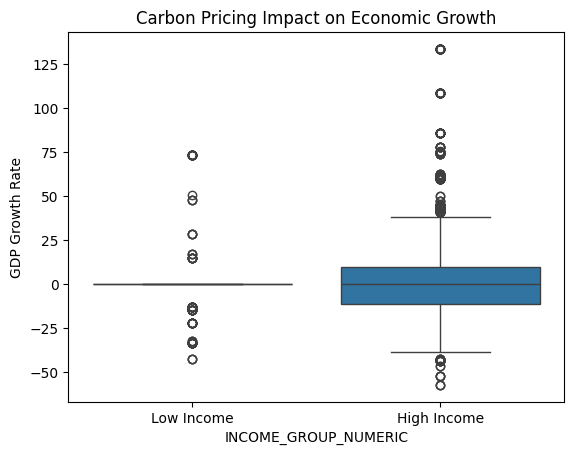

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Carbon Pricing Impact by Income Group
sns.boxplot(x='INCOME_GROUP_NUMERIC', y='GDP Growth Rate', data=data)
plt.xticks([0, 1], ['Low Income', 'High Income'])
plt.title("Carbon Pricing Impact on Economic Growth")
plt.show()

In [178]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
data["Carbon_Income_Interaction"] = data["CARBON_PRICE_LEVEL"] * data["INCOME_GROUP_NUMERIC"]
# Prepare data
X = data[["EFFECTIVE_CARBON_RATE","CARBON_PRICE_LEVEL",
          "CARBON_RATE_CHANGE", "CARBON_PRICING_IMPACT","EMISSIONS_PER_CAPITA","CARBON_EFFICIENCY_SCORE","CARBON_PRICE_CATEGORY"
          , "Carbon_Income_Interaction","Emissions_Intensity","Carbon_Rate_per_GDP","INCOME_GROUP_NUMERIC"]]
y = data["GDP Growth Rate"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [179]:
print(data.isna().sum()) 

REFERENCE_AREA               0
ECONOMIC_SECTOR              0
EMISSIONS_SOURCE             0
PRICE_LEVEL                  0
CARBON_PRICE_LEVEL           0
TIME_PERIOD                  0
%OF_EMISSION_PRICED          0
POPULATION-SIZE              0
EFFECTIVE_CARBON_RATE        0
TOTAL_EMISSIONS_DATA         0
INCOME_GROUP                 0
GDP(EUR)                     0
GDP per capita (EUR)         0
INCOME_GROUP_NUMERIC         0
CARBON_PRICING_IMPACT        0
EMISSIONS_PER_CAPITA         0
CARBON_EFFICIENCY_SCORE      0
CARBON_RATE_CHANGE           0
CARBON_PRICE_CATEGORY        0
Emissions_Intensity          0
Carbon_Rate_per_GDP          0
Actual_Emissions_Priced      0
Actual_Price_Paid            0
GDP Growth Rate              0
Carbon_Income_Interaction    0
dtype: int64


In [180]:
print(np.isinf(X_train).sum())  # Check for infinite values

EFFECTIVE_CARBON_RATE          0
CARBON_PRICE_LEVEL             0
CARBON_RATE_CHANGE           105
CARBON_PRICING_IMPACT          0
EMISSIONS_PER_CAPITA           0
CARBON_EFFICIENCY_SCORE      138
CARBON_PRICE_CATEGORY          0
Carbon_Income_Interaction      0
Emissions_Intensity            0
Carbon_Rate_per_GDP            0
INCOME_GROUP_NUMERIC           0
dtype: int64


In [181]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.median())


In [182]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [183]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate model
print(f"Random Forest R² Score: {r2_score(y_test, y_pred)}")

Random Forest R² Score: 0.7445775068805758


In [184]:
# Calculate the actual price paid by each country
data['Actual_Price_Paid'] = data['EFFECTIVE_CARBON_RATE'] * data['Actual_Emissions_Priced']
data.head()

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,EMISSIONS_PER_CAPITA,CARBON_EFFICIENCY_SCORE,CARBON_RATE_CHANGE,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid,GDP Growth Rate,Carbon_Income_Interaction
3,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,43.442249,2.730840e+05,164.813207,0.0272,...,9.960305e-08,6059.309063,0.000000,3,9.546994e-09,0.000058,0.011816,1.947481,9.016553,120
8,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2012,15.950274,9.973449e+08,37.075676,3.2504,...,3.259053e-09,11.406496,0.000000,2,1.550424e-02,0.176849,0.518448,19.221799,-24.842141,240
9,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2021,31.208641,1.217882e+09,47.059166,4.0237,...,3.303851e-09,11.695496,26.927333,2,1.002531e-02,0.117251,1.255742,59.094175,133.776723,240
11,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,53.187443,3.346900e+04,72.459452,0.0212,...,6.334220e-07,3417.898691,0.000000,0,1.670547e-08,0.000057,0.011276,0.817034,8.095595,120
12,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2021,89.590881,3.425200e+04,86.341553,0.0113,...,3.299077e-07,7640.845398,19.158440,0,6.837459e-09,0.000052,0.010124,0.874102,33.275302,120


In [185]:
missing_values = data.isnull().sum()
missing_values

REFERENCE_AREA               0
ECONOMIC_SECTOR              0
EMISSIONS_SOURCE             0
PRICE_LEVEL                  0
CARBON_PRICE_LEVEL           0
TIME_PERIOD                  0
%OF_EMISSION_PRICED          0
POPULATION-SIZE              0
EFFECTIVE_CARBON_RATE        0
TOTAL_EMISSIONS_DATA         0
INCOME_GROUP                 0
GDP(EUR)                     0
GDP per capita (EUR)         0
INCOME_GROUP_NUMERIC         0
CARBON_PRICING_IMPACT        0
EMISSIONS_PER_CAPITA         0
CARBON_EFFICIENCY_SCORE      0
CARBON_RATE_CHANGE           0
CARBON_PRICE_CATEGORY        0
Emissions_Intensity          0
Carbon_Rate_per_GDP          0
Actual_Emissions_Priced      0
Actual_Price_Paid            0
GDP Growth Rate              0
Carbon_Income_Interaction    0
dtype: int64

In [186]:
##data = data.dropna(subset=["CARBON_RATE_CHANGE","CARBON_EFFICIENCY_SCORE","CARBON_PRICE_CATEGORY"])
##print(data.isnull().sum())

In [187]:
data=data.dropna(subset=["CARBON_PRICE_CATEGORY"])
# Fill missing values with the median for numeric columns only
data.fillna(data.select_dtypes(include=['number']).median(), inplace=True)

print(data.isnull().sum())

REFERENCE_AREA               0
ECONOMIC_SECTOR              0
EMISSIONS_SOURCE             0
PRICE_LEVEL                  0
CARBON_PRICE_LEVEL           0
TIME_PERIOD                  0
%OF_EMISSION_PRICED          0
POPULATION-SIZE              0
EFFECTIVE_CARBON_RATE        0
TOTAL_EMISSIONS_DATA         0
INCOME_GROUP                 0
GDP(EUR)                     0
GDP per capita (EUR)         0
INCOME_GROUP_NUMERIC         0
CARBON_PRICING_IMPACT        0
EMISSIONS_PER_CAPITA         0
CARBON_EFFICIENCY_SCORE      0
CARBON_RATE_CHANGE           0
CARBON_PRICE_CATEGORY        0
Emissions_Intensity          0
Carbon_Rate_per_GDP          0
Actual_Emissions_Priced      0
Actual_Price_Paid            0
GDP Growth Rate              0
Carbon_Income_Interaction    0
dtype: int64


In [188]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables (e.g., Carbon Price Category, Income Group)
data['CARBON_PRICE_CATEGORY'] = LabelEncoder().fit_transform(data['CARBON_PRICE_CATEGORY'])
data.head(5)

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,EMISSIONS_PER_CAPITA,CARBON_EFFICIENCY_SCORE,CARBON_RATE_CHANGE,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid,GDP Growth Rate,Carbon_Income_Interaction
3,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,43.442249,2.730840e+05,164.813207,0.0272,...,9.960305e-08,6059.309063,0.000000,3,9.546994e-09,0.000058,0.011816,1.947481,9.016553,120
8,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2012,15.950274,9.973449e+08,37.075676,3.2504,...,3.259053e-09,11.406496,0.000000,2,1.550424e-02,0.176849,0.518448,19.221799,-24.842141,240
9,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2021,31.208641,1.217882e+09,47.059166,4.0237,...,3.303851e-09,11.695496,26.927333,2,1.002531e-02,0.117251,1.255742,59.094175,133.776723,240
11,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,53.187443,3.346900e+04,72.459452,0.0212,...,6.334220e-07,3417.898691,0.000000,0,1.670547e-08,0.000057,0.011276,0.817034,8.095595,120
12,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2021,89.590881,3.425200e+04,86.341553,0.0113,...,3.299077e-07,7640.845398,19.158440,0,6.837459e-09,0.000052,0.010124,0.874102,33.275302,120


In [189]:
# Define economic growth rate as a derived feature (Assume GDP data is available externally)
data['GDP Growth Rate'] = data.groupby('REFERENCE_AREA')['GDP(EUR)'].pct_change() * 100
data.head(5)

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,EMISSIONS_PER_CAPITA,CARBON_EFFICIENCY_SCORE,CARBON_RATE_CHANGE,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid,GDP Growth Rate,Carbon_Income_Interaction
3,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,43.442249,2.730840e+05,164.813207,0.0272,...,9.960305e-08,6059.309063,0.000000,3,9.546994e-09,0.000058,0.011816,1.947481,NaN,120
8,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2012,15.950274,9.973449e+08,37.075676,3.2504,...,3.259053e-09,11.406496,0.000000,2,1.550424e-02,0.176849,0.518448,19.221799,NaN,240
9,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2021,31.208641,1.217882e+09,47.059166,4.0237,...,3.303851e-09,11.695496,26.927333,2,1.002531e-02,0.117251,1.255742,59.094175,133.776723,240
11,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,53.187443,3.346900e+04,72.459452,0.0212,...,6.334220e-07,3417.898691,0.000000,0,1.670547e-08,0.000057,0.011276,0.817034,NaN,120
12,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2021,89.590881,3.425200e+04,86.341553,0.0113,...,3.299077e-07,7640.845398,19.158440,0,6.837459e-09,0.000052,0.010124,0.874102,33.275302,120


In [190]:
#data["GDP_Growth_Rate_Sector"] = data.groupby(["REFERENCE_AREA", "ECONOMIC_SECTOR"])["GDP(EUR)"].pct_change() * 100
data["Annual_GDP_Growth_Rate"] = (
    data.groupby(["REFERENCE_AREA", "ECONOMIC_SECTOR"])["GDP(EUR)"]
    .transform(lambda x: (x / x.shift(1))**(1/3) - 1) * 100
)
data

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,CARBON_EFFICIENCY_SCORE,CARBON_RATE_CHANGE,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid,GDP Growth Rate,Carbon_Income_Interaction,Annual_GDP_Growth_Rate
3,Netherlands,Agriculture & fisheries,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,43.442249,2.730840e+05,164.813207,0.0272,...,6059.309063,0.000000,3,9.546994e-09,0.000058,0.011816,1.947481,NaN,120,NaN
8,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2012,15.950274,9.973449e+08,37.075676,3.2504,...,11.406496,0.000000,2,1.550424e-02,0.176849,0.518448,19.221799,NaN,240,NaN
9,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2021,31.208641,1.217882e+09,47.059166,4.0237,...,11.695496,26.927333,2,1.002531e-02,0.117251,1.255742,59.094175,133.776723,240,32.719200
11,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2012,53.187443,3.346900e+04,72.459452,0.0212,...,3417.898691,0.000000,0,1.670547e-08,0.000057,0.011276,0.817034,NaN,120,NaN
12,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2021,89.590881,3.425200e+04,86.341553,0.0113,...,7640.845398,19.158440,0,6.837459e-09,0.000052,0.010124,0.874102,33.275302,120,10.048271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211,Costa Rica,Transport,Fossil fuels,BEN_EUR_TCO2E_30,30,2021,86.046127,5.059988e+06,69.814255,5.6899,...,12.269856,24.601184,0,4.817430e-04,0.005911,4.895939,341.806306,0.000000,60,0.000000
8212,Australia,Energy use sectors,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_60,60,2018,20.355659,2.496326e+07,23.130037,34.5605,...,0.669262,5.717778,2,6.567852e-04,0.000440,7.035018,162.720220,-8.281863,120,-2.840544
8213,New Zealand,Transport,Fossil fuels,BEN_EUR_TCO2E_120,120,2018,9.582388,2.798150e+05,13.998988,16.0180,...,0.873954,-54.906890,2,2.299694e-05,0.000020,1.534907,21.487143,18.945275,240,0.000000
8214,China,Transport,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,30,2018,56.913464,1.402760e+09,57.796828,950.9561,...,0.060778,0.000000,0,1.043519e-01,0.006342,541.222054,31280.917748,0.000000,60,0.000000


In [191]:

# Example DataFrame
new_data = pd.DataFrame(data)
new_data

# Save DataFrame to Excel
new_data.to_excel("output.xlsx", index=False)  # index=False to remove index column

print("Excel file saved successfully!")


Excel file saved successfully!


In [192]:
#Drop rowa with missing GDP by sector
data.dropna(subset=['Annual_GDP_Growth_Rate'], inplace=True)

In [193]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables (e.g., Carbon Price Category, Income Group)
data['CARBON_PRICE_CATEGORY'] = LabelEncoder().fit_transform(data['CARBON_PRICE_CATEGORY'])
data.head(5)

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,CARBON_EFFICIENCY_SCORE,CARBON_RATE_CHANGE,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid,GDP Growth Rate,Carbon_Income_Interaction,Annual_GDP_Growth_Rate
9,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2021,31.208641,1.217882e+09,47.059166,4.0237,...,11.695496,26.927333,2,1.002531e-02,0.117251,1.255742,59.094175,133.776723,240,32.719200
12,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2021,89.590881,3.425200e+04,86.341553,0.0113,...,7640.845398,19.158440,0,6.837459e-09,0.000052,0.010124,0.874102,33.275302,120,10.048271
15,Netherlands,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,30,2012,25.177431,2.730840e+05,164.813207,22.1591,...,7.437721,0.000000,3,7.777676e-06,0.000058,5.579092,919.508064,9.016553,60,2.919456
16,Netherlands,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,30,2021,65.928215,2.797920e+05,53.588871,22.2375,...,2.409842,-67.485087,0,6.413548e-06,0.000015,14.660787,785.655014,24.687929,60,7.632015
20,Greece,Transport,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_60,60,2012,31.924242,4.829100e+04,37.927020,16.4151,...,2.310496,0.000000,2,3.607553e-06,0.000008,5.240396,198.752612,22.754980,120,7.072935


In [195]:
def extract_price_level(val):
    try:
        parts = str(val).split()
        if len(parts) > 1 and parts[1].isdigit():
            return int(parts[1])
        elif parts[0].isdigit():
            return int(parts[0])
    except Exception:
        return None  # or np.nan
    return None

data["CARBON_PRICE_LEVEL"] = data["CARBON_PRICE_LEVEL"].apply(extract_price_level)

In [196]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
data["Carbon_Income_Interaction"] = data["CARBON_PRICE_LEVEL"] * data["INCOME_GROUP_NUMERIC"]
# Prepare data
X = data[["EFFECTIVE_CARBON_RATE","CARBON_PRICE_LEVEL",
          "CARBON_RATE_CHANGE", "CARBON_PRICING_IMPACT","EMISSIONS_PER_CAPITA","CARBON_EFFICIENCY_SCORE","CARBON_PRICE_CATEGORY"
          , "Carbon_Income_Interaction","Emissions_Intensity","Carbon_Rate_per_GDP","INCOME_GROUP_NUMERIC"]]
y = data["GDP Growth Rate"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [197]:
print(data.isna().sum()) 

REFERENCE_AREA               0
ECONOMIC_SECTOR              0
EMISSIONS_SOURCE             0
PRICE_LEVEL                  0
CARBON_PRICE_LEVEL           0
TIME_PERIOD                  0
%OF_EMISSION_PRICED          0
POPULATION-SIZE              0
EFFECTIVE_CARBON_RATE        0
TOTAL_EMISSIONS_DATA         0
INCOME_GROUP                 0
GDP(EUR)                     0
GDP per capita (EUR)         0
INCOME_GROUP_NUMERIC         0
CARBON_PRICING_IMPACT        0
EMISSIONS_PER_CAPITA         0
CARBON_EFFICIENCY_SCORE      0
CARBON_RATE_CHANGE           0
CARBON_PRICE_CATEGORY        0
Emissions_Intensity          0
Carbon_Rate_per_GDP          0
Actual_Emissions_Priced      0
Actual_Price_Paid            0
GDP Growth Rate              0
Carbon_Income_Interaction    0
Annual_GDP_Growth_Rate       0
dtype: int64


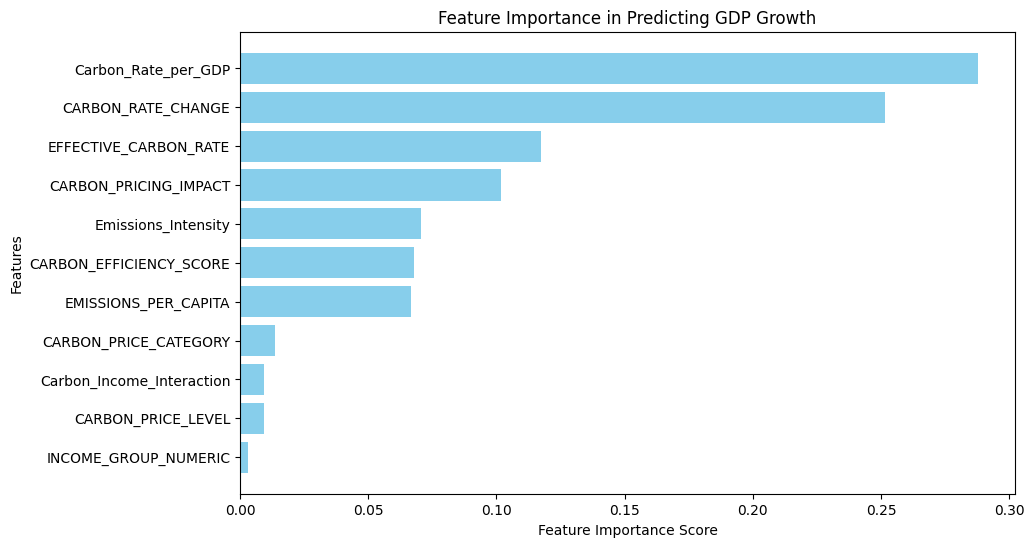

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting GDP Growth")
plt.gca().invert_yaxis()  # Invert to show highest importance at top
plt.show()

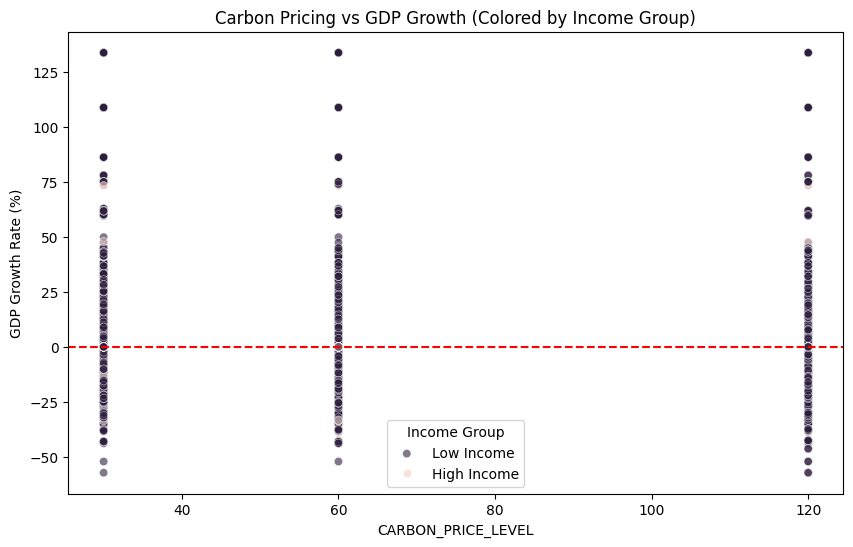

In [199]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="CARBON_PRICE_LEVEL", y="GDP Growth Rate", hue="INCOME_GROUP_NUMERIC", alpha=0.6)
plt.xlabel("CARBON_PRICE_LEVEL")
plt.ylabel("GDP Growth Rate (%)")
plt.title("Carbon Pricing vs GDP Growth (Colored by Income Group)")
plt.axhline(0, color='red', linestyle='dashed')  # Reference line at 0% growth
plt.legend(title="Income Group", labels=["Low Income", "High Income"])
plt.show()


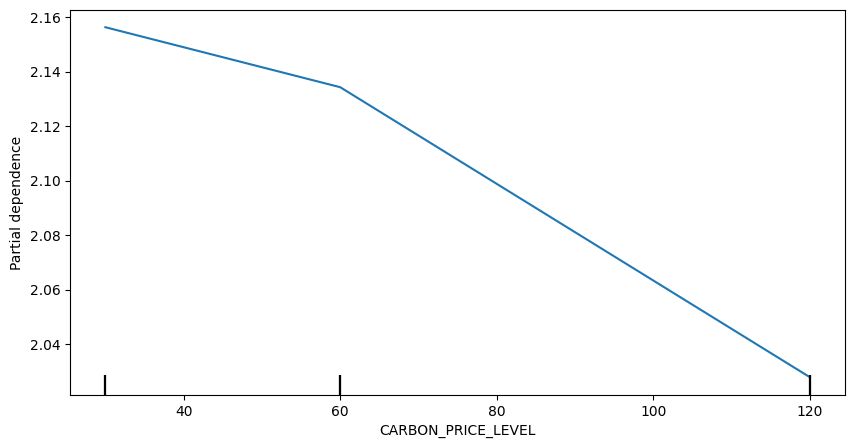

In [200]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(10,5))
PartialDependenceDisplay.from_estimator(rf, X_train, ["CARBON_PRICE_LEVEL"], ax=ax)
plt.show()

Flat region (before ~60 EUR/tCO2e):

GDP growth remains constant (~2.14%) when carbon pricing is below ~60 EUR. This suggests that low to moderate carbon pricing does not significantly impact GDP growth. Declining region (above ~60 EUR/tCO2e):

As carbon price increases beyond ,60 EUR, GDP growth starts declining. The decline appears linear, indicating a negative correlation between higher carbon pricing and GDP growth. Sharpest decline (~100+ EUR/tCO2e):

When the carbon price reaches 120 EUR/tCO2e, GDP growth drops to ~2.02%. This suggests that very high carbon prices could slow economic growth

In [201]:
X_train.head(5)

,EFFECTIVE_CARBON_RATE,CARBON_PRICE_LEVEL,CARBON_RATE_CHANGE,CARBON_PRICING_IMPACT,EMISSIONS_PER_CAPITA,CARBON_EFFICIENCY_SCORE,CARBON_PRICE_CATEGORY,Carbon_Income_Interaction,Emissions_Intensity,Carbon_Rate_per_GDP,INCOME_GROUP_NUMERIC
450,29.896215,120,16.533064,4.712200e-11,0.000007,0.619978,2,240,0.000851,0.000528,2
674,158.877318,30,5.774366,1.551645e-10,0.000173,9.805789,3,60,0.000002,0.000023,2
1357,17.702889,60,0.000000,2.275936e-11,0.000003,0.697222,2,120,0.000523,0.000365,2
6529,251.269440,60,126.587770,3.895329e-11,0.000002,1.999782,3,120,0.003297,0.006594,2
739,110.892764,30,0.000000,1.117948e-11,0.000001,1.242912,3,60,0.002373,0.002950,2


In [202]:
low_income = X_train[X_train['INCOME_GROUP_NUMERIC'] == 1]
high_income = X_train[X_train['INCOME_GROUP_NUMERIC'] == 2]

In [209]:
import numpy as np

print("Any NaNs?", low_income[features].isna().any().any())
print("Any infinite?", np.isinf(low_income[features]).any().any())
print("Any very large values?", (low_income[features].abs() > 1e10).any().any())


print("Any NaNs?", high_income[features].isna().any().any())
print("Any infinite?", np.isinf(high_income[features]).any().any())
print("Any very large values?", (high_income[features].abs() > 1e10).any().any())



Any NaNs? False
Any infinite? True
Any very large values? True
Any NaNs? False
Any infinite? True
Any very large values? True


In [210]:
# Replace inf values with NaN
low_income_clean = low_income[features].replace([np.inf, -np.inf], np.nan)
high_income_clean = high_income[features].replace([np.inf, -np.inf], np.nan)

# Option 1: Drop rows with any NaN
low_income_clean = low_income_clean.dropna()
high_income_clean = high_income_clean.dropna()

# Ensure y_train aligns with cleaned data
y_low = y_train.loc[low_income_clean.index]
y_high = y_train.loc[high_income_clean.index]

# Now fit
rf_low.fit(low_income_clean, y_low)
rf_high.fit(high_income_clean, y_high)


RandomForestRegressor()

In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
low_income_scaled = scaler.fit_transform(low_income_clean)
high_income_scaled = scaler.fit_transform(high_income_clean)


In [216]:
from sklearn.ensemble import RandomForestRegressor

# Define features
features = ["Carbon_Rate_per_GDP", "CARBON_RATE_CHANGE","EFFECTIVE_CARBON_RATE"]

# Train separate models for each group
#rf_low = RandomForestRegressor()
#rf_high = RandomForestRegressor()

#rf_low.fit(low_income_clean[features], y_low.loc[low_income.index])
#rf_high.fit(co[features], y_high.loc[high_income.index])

# Make sure target variable matches cleaned features exactly
y_low = y_train.loc[low_income_clean.index]
y_high = y_train.loc[high_income_clean.index]

# Fit the models using cleaned feature sets and matched targets
rf_low.fit(low_income_clean[features], y_low)
rf_high.fit(high_income_clean[features], y_high)

RandomForestRegressor()

C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step


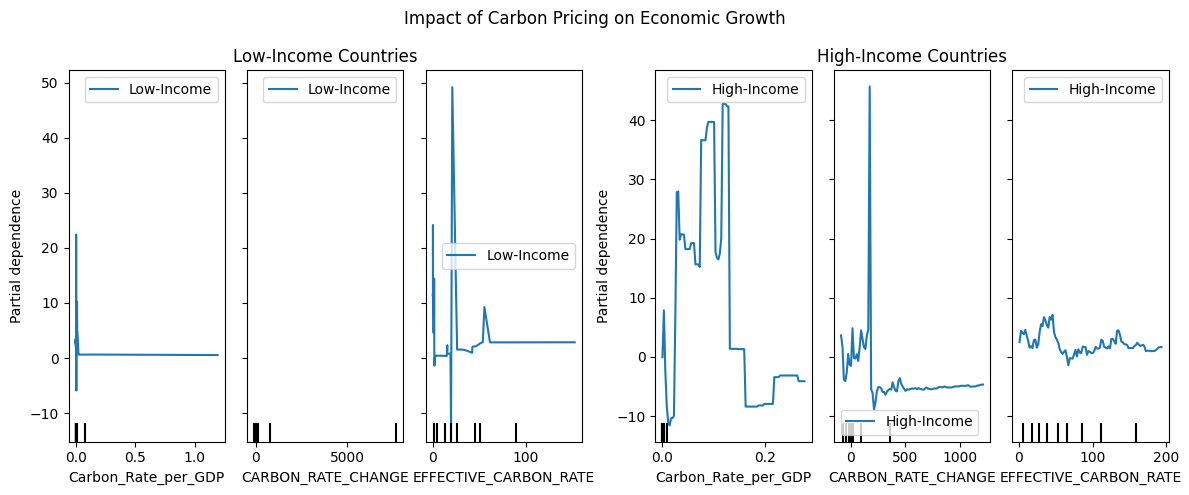

In [217]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create 2 subplots

# Low-Income PDP
PartialDependenceDisplay.from_estimator(
    rf_low, low_income[features], features, ax=axes[0], line_kw={'label': 'Low-Income'}
)
axes[0].set_title("Low-Income Countries")

# High-Income PDP
PartialDependenceDisplay.from_estimator(
    rf_high, high_income[features], features, ax=axes[1], line_kw={'label': 'High-Income'}
)
axes[1].set_title("High-Income Countries")

plt.suptitle("Impact of Carbon Pricing on Economic Growth")
plt.tight_layout()
plt.show()



In [218]:
# Drop rows with missing GDP growth rate
data.dropna(subset=['GDP Growth Rate'], inplace=True)


# Define independent variables
X = data[['EFFECTIVE_CARBON_RATE', 'CARBON_RATE_CHANGE', 'CARBON_PRICING_IMPACT', 'CARBON_PRICE_CATEGORY',
        'Carbon_Rate_per_GDP', 'TOTAL_EMISSIONS_DATA',
        '%OF_EMISSION_PRICED', 'EMISSIONS_PER_CAPITA', 'CARBON_EFFICIENCY_SCORE', 'INCOME_GROUP_NUMERIC']]

# Define target variable
y = data['GDP Growth Rate']

# Check dataset after preprocessing
print(data.head())

   REFERENCE_AREA     ECONOMIC_SECTOR               EMISSIONS_SOURCE  \
9         Ireland            Industry  Fossil fuels and biofuels CO2   
12       Slovenia  Energy use sectors                   Fossil fuels   
15    Netherlands            Industry  Fossil fuels and biofuels CO2   
16    Netherlands            Industry  Fossil fuels and biofuels CO2   
20         Greece           Transport  Fossil fuels and biofuels CO2   

          PRICE_LEVEL  CARBON_PRICE_LEVEL  TIME_PERIOD  %OF_EMISSION_PRICED  \
9   BEN_EUR_TCO2E_120                 120         2021            31.208641   
12   BEN_EUR_TCO2E_60                  60         2021            89.590881   
15   BEN_EUR_TCO2E_30                  30         2012            25.177431   
16   BEN_EUR_TCO2E_30                  30         2021            65.928215   
20   BEN_EUR_TCO2E_60                  60         2012            31.924242   

    POPULATION-SIZE  EFFECTIVE_CARBON_RATE  TOTAL_EMISSIONS_DATA  ...  \
9      1.217882e+09

In [219]:
print(data.isnull().sum())

REFERENCE_AREA               0
ECONOMIC_SECTOR              0
EMISSIONS_SOURCE             0
PRICE_LEVEL                  0
CARBON_PRICE_LEVEL           0
TIME_PERIOD                  0
%OF_EMISSION_PRICED          0
POPULATION-SIZE              0
EFFECTIVE_CARBON_RATE        0
TOTAL_EMISSIONS_DATA         0
INCOME_GROUP                 0
GDP(EUR)                     0
GDP per capita (EUR)         0
INCOME_GROUP_NUMERIC         0
CARBON_PRICING_IMPACT        0
EMISSIONS_PER_CAPITA         0
CARBON_EFFICIENCY_SCORE      0
CARBON_RATE_CHANGE           0
CARBON_PRICE_CATEGORY        0
Emissions_Intensity          0
Carbon_Rate_per_GDP          0
Actual_Emissions_Priced      0
Actual_Price_Paid            0
GDP Growth Rate              0
Carbon_Income_Interaction    0
Annual_GDP_Growth_Rate       0
dtype: int64


In [220]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
import numpy as np
import pandas as pd

# Check NaN values
print("NaN values in X_train:", np.isnan(X_train).sum().sum())
print("NaN values in y_train:", np.isnan(y_train).sum())

# Check infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())


NaN values in X_train: 0
NaN values in y_train: 0
Infinite values in X_train: 226
Infinite values in y_train: 0


In [222]:
import numpy as np
import pandas as pd

# Find NaN values in X_train
nan_cols = X_train.columns[X_train.isna().any()].tolist()
if nan_cols:
    print("Columns with NaN values:", nan_cols)
    print(X_train[nan_cols].isna().sum())

# Find infinite values in X_train
inf_mask = np.isinf(X_train)
if np.any(inf_mask):
    print("Columns with Infinite values:", X_train.columns[np.any(inf_mask, axis=0)])

# Check NaN or Inf in y_train
if np.isnan(y_train).any():
    print("y_train contains NaN values!")

if np.isinf(y_train).any():
    print("y_train contains Infinite values!")


Columns with Infinite values: Index(['CARBON_RATE_CHANGE', 'CARBON_EFFICIENCY_SCORE'], dtype='object')


In [223]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure alignment


In [224]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # Convert inf to NaN
X_train = X_train.fillna(X_train.mean())  # Replace NaN with mean


In [225]:
import numpy as np

# Convert Inf values to NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
y_train = y_train.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Ensure y_train matches X_train after dropping rows

# Verify after fixing
print("NaN values in X_train:", np.isnan(X_train).sum().sum())
print("NaN values in y_train:", np.isnan(y_train).sum())



NaN values in X_train: 0
NaN values in y_train: 0


In [226]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare data 
X = data[['EFFECTIVE_CARBON_RATE', 'CARBON_RATE_CHANGE', 'CARBON_PRICING_IMPACT',
        'CARBON_PRICE_CATEGORY', 'Carbon_Rate_per_GDP', 'TOTAL_EMISSIONS_DATA', 'Actual_Emissions_Priced',
        'EMISSIONS_PER_CAPITA', 'CARBON_EFFICIENCY_SCORE', 'INCOME_GROUP_NUMERIC', '%OF_EMISSION_PRICED', 'Emissions_Intensity']]
y = data['GDP Growth Rate']  

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [227]:
import numpy as np
import pandas as pd

# Check NaN values
print("NaN values in X_train:", np.isnan(X_train).sum().sum())
print("NaN values in y_train:", np.isnan(y_train).sum())

# Check infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())


NaN values in X_train: 0
NaN values in y_train: 0
Infinite values in X_train: 226
Infinite values in y_train: 0


In [228]:
# Check for NaN and infinite values in the test data (X_test and y_test)
print("NaN values in X_test:", np.isnan(X_test).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum())

print("NaN values in y_test:", np.isnan(y_test).sum())
print("Infinite values in y_test:", np.isinf(y_test).sum())


NaN values in X_test: EFFECTIVE_CARBON_RATE      0
CARBON_RATE_CHANGE         0
CARBON_PRICING_IMPACT      0
CARBON_PRICE_CATEGORY      0
Carbon_Rate_per_GDP        0
TOTAL_EMISSIONS_DATA       0
Actual_Emissions_Priced    0
EMISSIONS_PER_CAPITA       0
CARBON_EFFICIENCY_SCORE    0
INCOME_GROUP_NUMERIC       0
%OF_EMISSION_PRICED        0
Emissions_Intensity        0
dtype: int64
Infinite values in X_test: EFFECTIVE_CARBON_RATE       0
CARBON_RATE_CHANGE         23
CARBON_PRICING_IMPACT       0
CARBON_PRICE_CATEGORY       0
Carbon_Rate_per_GDP         0
TOTAL_EMISSIONS_DATA        0
Actual_Emissions_Priced     0
EMISSIONS_PER_CAPITA        0
CARBON_EFFICIENCY_SCORE    33
INCOME_GROUP_NUMERIC        0
%OF_EMISSION_PRICED         0
Emissions_Intensity         0
dtype: int64
NaN values in y_test: 0
Infinite values in y_test: 0


In [229]:
X_train = X_train.dropna()
y_train = y_train[X_train.index] 

In [230]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # Convert inf to NaN
X_train = X_train.fillna(X_train.mean())  # Replace NaN with mean

In [231]:
# Drop rows with infinite values in X_test
X_test_clean = X_test.replace([np.inf, -np.inf], np.nan).dropna()

# If you want to ensure y_test matches X_test_clean, drop corresponding rows in y_test
y_test_clean = y_test[X_test_clean.index]


In [232]:
import numpy as np
import pandas as pd

# Check NaN values
print("NaN values in X_train:", np.isnan(X_train).sum().sum())
print("NaN values in y_train:", np.isnan(y_train).sum())

# Check infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())


NaN values in X_train: 0
NaN values in y_train: 0
Infinite values in X_train: 0
Infinite values in y_train: 0


In [233]:
# Check for NaN values in X_test_clean and y_test_clean
print("NaN values in X_test_clean:", np.isnan(X_test_clean).sum().sum())
print("NaN values in y_test_clean:", np.isnan(y_test_clean).sum())

# Check for infinite values in X_test_clean and y_test_clean
print("Infinite values in X_test_clean:", np.isinf(X_test_clean).sum().sum())
print("Infinite values in y_test_clean:", np.isinf(y_test_clean).sum())


NaN values in X_test_clean: 0
NaN values in y_test_clean: 0
Infinite values in X_test_clean: 0
Infinite values in y_test_clean: 0


In [234]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_clean) ######

# Evaluate model performance
r2 = r2_score(y_test_clean, y_pred) ######
mae = mean_absolute_error(y_test_clean, y_pred)  #####

print(f"Random Forest R²: {r2}")
print(f"Random Forest MAE: {mae}")

Random Forest R²: 0.7860352509816939
Random Forest MAE: 6.206616748725779


In [235]:
# Ensure X_test has the same features as X_train
X_test = X_test[X_train.columns]  

# Replace Inf values with NaN and drop NaNs
X_test_clean = X_test.replace([np.inf, -np.inf], np.nan).dropna()

# Align y_test with X_test_clean
y_test_clean = y_test.loc[X_test_clean.index]  

# Check if X_test_clean is empty before predicting
if X_test_clean.empty:
    print("Error: X_test_clean is empty after cleaning!")
else:
    y_pred = rf_model.predict(X_test_clean)
    
    # Evaluate model performance
    r2 = r2_score(y_test_clean, y_pred)
    mae = mean_absolute_error(y_test_clean, y_pred)

    print(f"Random Forest R²: {r2}")
    print(f"Random Forest MAE: {mae}")


Random Forest R²: 0.7860352509816939
Random Forest MAE: 6.206616748725779


In [236]:
# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                    Feature  Importance
1        CARBON_RATE_CHANGE    0.234710
4       Carbon_Rate_per_GDP    0.227295
0     EFFECTIVE_CARBON_RATE    0.104860
2     CARBON_PRICING_IMPACT    0.069772
11      Emissions_Intensity    0.069721
7      EMISSIONS_PER_CAPITA    0.063279
5      TOTAL_EMISSIONS_DATA    0.058368
6   Actual_Emissions_Priced    0.053232
8   CARBON_EFFICIENCY_SCORE    0.051379
10      %OF_EMISSION_PRICED    0.050467
3     CARBON_PRICE_CATEGORY    0.015068
9      INCOME_GROUP_NUMERIC    0.001848


In [237]:
# Filter the important features
important_features = [
    'EFFECTIVE_CARBON_RATE', 'CARBON_RATE_CHANGE', 'Carbon_Rate_per_GDP',
    'TOTAL_EMISSIONS_DATA', 'Emissions_Intensity', 'CARBON_EFFICIENCY_SCORE', 
    '%OF_EMISSION_PRICED', 'Actual_Emissions_Priced'
]

# Split the data into high-income and low-income groups
high_income_data = data[data['INCOME_GROUP_NUMERIC'] == 2]  # High-income countries
low_income_data = data[data['INCOME_GROUP_NUMERIC'] == 1]   # Low-income countries

# Define target (y) for both groups
target = 'GDP Growth Rate'

# High-Income Model
X_high = high_income_data[important_features]
y_high = high_income_data[target]

X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)


# Low-Income Model
X_low = low_income_data[important_features]
y_low = low_income_data[target]

X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)




In [238]:
# Check for infinite values in high income
print("(X_train_high",np.isinf(X_train_high).sum())
print("X_test_high",np.isinf(X_test_high).sum())
print("y_train_high",np.isinf(y_train_high).sum())
print("y_test_high",np.isinf(y_test_high).sum())
# Check for infinite values in low income
print("(X_train_low",np.isinf(X_train_low).sum())
print("X_test_low",np.isinf(X_test_low).sum())
print("y_train_low",np.isinf(y_train_low).sum())
print("y_test_low",np.isinf(y_test_low).sum())

(X_train_high EFFECTIVE_CARBON_RATE        0
CARBON_RATE_CHANGE          92
Carbon_Rate_per_GDP          0
TOTAL_EMISSIONS_DATA         0
Emissions_Intensity          0
CARBON_EFFICIENCY_SCORE    101
%OF_EMISSION_PRICED          0
Actual_Emissions_Priced      0
dtype: int64
X_test_high EFFECTIVE_CARBON_RATE       0
CARBON_RATE_CHANGE         17
Carbon_Rate_per_GDP         0
TOTAL_EMISSIONS_DATA        0
Emissions_Intensity         0
CARBON_EFFICIENCY_SCORE    20
%OF_EMISSION_PRICED         0
Actual_Emissions_Priced     0
dtype: int64
y_train_high 0
y_test_high 0
(X_train_low EFFECTIVE_CARBON_RATE       0
CARBON_RATE_CHANGE         13
Carbon_Rate_per_GDP         0
TOTAL_EMISSIONS_DATA        0
Emissions_Intensity         0
CARBON_EFFICIENCY_SCORE    26
%OF_EMISSION_PRICED         0
Actual_Emissions_Priced     0
dtype: int64
X_test_low EFFECTIVE_CARBON_RATE      0
CARBON_RATE_CHANGE         7
Carbon_Rate_per_GDP        0
TOTAL_EMISSIONS_DATA       0
Emissions_Intensity        0
CARBON_EF

In [239]:
# Replace in high income
X_train_high = X_train_high.replace([np.inf, -np.inf], np.nan).fillna(X_train_high.median())
X_test_high = X_test_high.replace([np.inf, -np.inf], np.nan).fillna(X_test_high.median())
#Replace in low income
X_train_low = X_train_low.replace([np.inf, -np.inf], np.nan).fillna(X_train_low.median())
X_test_low = X_test_low.replace([np.inf, -np.inf], np.nan).fillna(X_test_low.median())

In [240]:
#Ensure Columns are numeric
X_train_high = X_train_high.apply(pd.to_numeric, errors='coerce')
X_test_high = X_test_high.apply(pd.to_numeric, errors='coerce')

X_train_low = X_train_low.apply(pd.to_numeric, errors='coerce')
X_test_low = X_test_low.apply(pd.to_numeric, errors='coerce')

In [241]:
rf_high_income = RandomForestRegressor(n_estimators=100, random_state=42)
rf_high_income.fit(X_train_high, y_train_high)

y_pred_high = rf_high_income.predict(X_test_high)
print("High-Income Country Model Performance:")
print("R²: ", r2_score(y_test_high, y_pred_high))
print("MAE: ", mean_absolute_error(y_test_high, y_pred_high))

High-Income Country Model Performance:
R²:  0.7562157770879234
MAE:  6.493139194501423


In [242]:
rf_low_income = RandomForestRegressor(n_estimators=100, random_state=42)
rf_low_income.fit(X_train_low, y_train_low)

y_pred_low = rf_low_income.predict(X_test_low)
print("\nLow-Income Country Model Performance:")
print("R²: ", r2_score(y_test_low, y_pred_low))
print("MAE: ", mean_absolute_error(y_test_low, y_pred_low))


Low-Income Country Model Performance:
R²:  0.6447938555618087
MAE:  5.54733136957849


The lower MAE and higher R² for low-income countries might suggest that carbon pricing in low-income countries has a more predictable and potentially more direct impact on GDP growth. The model might be capturing the economic adaptation of low-income countries to carbon pricing more effectively.

This suggests that low-income countries may be more sensitive to the economic impacts of carbon pricing than high-income countries, which might be better equipped to manage the transitions associated with carbon pricing (such as investing in cleaner technologies or adapting their industries).

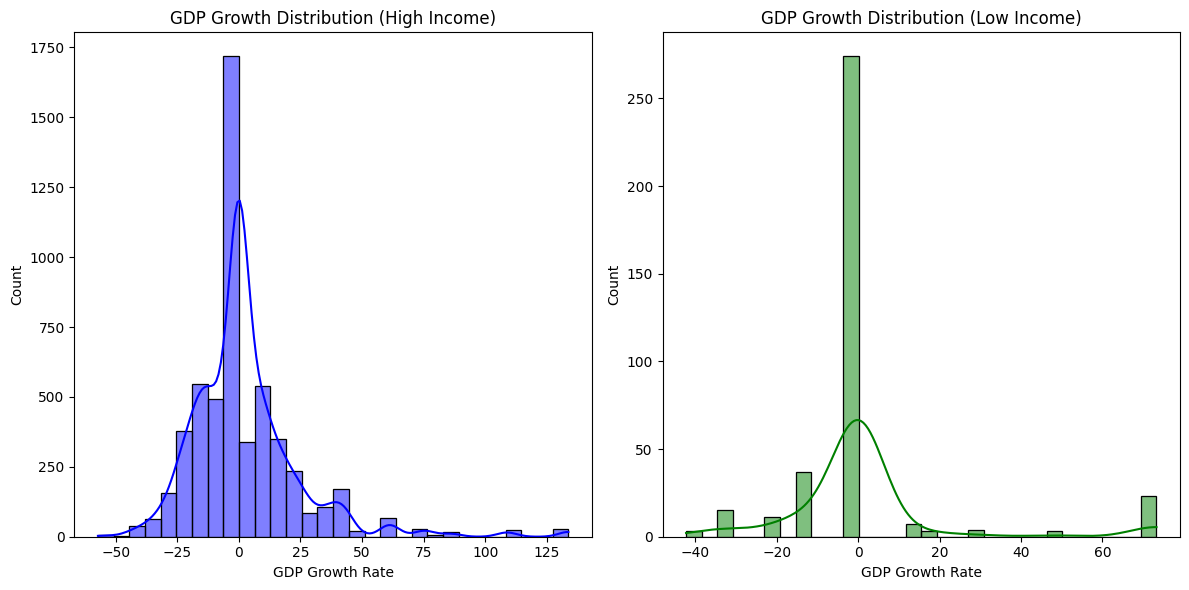

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of GDP growth for high and low-income countries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(high_income_data['GDP Growth Rate'], kde=True, color='blue', bins=30)
plt.title('GDP Growth Distribution (High Income)')

plt.subplot(1, 2, 2)
sns.histplot(low_income_data['GDP Growth Rate'], kde=True, color='green', bins=30)
plt.title('GDP Growth Distribution (Low Income)')

plt.tight_layout()
plt.show()


The GDP growth rates for high-income countries have a more concentrated distribution, with most values clustering around a small positive range.The peak is sharp, suggesting that most high-income countries experience stable GDP growth without extreme fluctuations.

The GDP growth rates for low-income countries show a different distribution, with a prominent spike at zero or near-zero growth.This distribution seems more dispersed, meaning that some low-income countries experience significant negative or positive GDP growth.

In [244]:
data.columns

Index(['REFERENCE_AREA', 'ECONOMIC_SECTOR', 'EMISSIONS_SOURCE', 'PRICE_LEVEL',
       'CARBON_PRICE_LEVEL', 'TIME_PERIOD', '%OF_EMISSION_PRICED',
       'POPULATION-SIZE', 'EFFECTIVE_CARBON_RATE', 'TOTAL_EMISSIONS_DATA',
       'INCOME_GROUP', 'GDP(EUR)', 'GDP per capita (EUR)',
       'INCOME_GROUP_NUMERIC', 'CARBON_PRICING_IMPACT', 'EMISSIONS_PER_CAPITA',
       'CARBON_EFFICIENCY_SCORE', 'CARBON_RATE_CHANGE',
       'CARBON_PRICE_CATEGORY', 'Emissions_Intensity', 'Carbon_Rate_per_GDP',
       'Actual_Emissions_Priced', 'Actual_Price_Paid', 'GDP Growth Rate',
       'Carbon_Income_Interaction', 'Annual_GDP_Growth_Rate'],
      dtype='object')

In [245]:
for sector in data['ECONOMIC_SECTOR'].unique():
    max_growth = data[data['ECONOMIC_SECTOR'] == sector]['Annual_GDP_Growth_Rate'].max()
    print(f"Max Growth Rate for {sector}: {max_growth}")

Max Growth Rate for Industry: 32.71920017095733
Max Growth Rate for Energy use sectors: 32.71920017095733
Max Growth Rate for Transport: 32.71920017095733
Max Growth Rate for Agriculture & fisheries: 32.71920017095733
Max Growth Rate for Buildings: 32.71920017095733


In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import PartialDependenceDisplay



# Select relevant features
features = ['EFFECTIVE_CARBON_RATE', 'CARBON_RATE_CHANGE', 'CARBON_PRICE_CATEGORY', 
            'Carbon_Rate_per_GDP', 'TOTAL_EMISSIONS_DATA', 'EMISSIONS_PER_CAPITA',
            'CARBON_EFFICIENCY_SCORE', '%OF_EMISSION_PRICED', 'GDP per capita (EUR)']

target = 'Annual_GDP_Growth_Rate'

# Drop NaN values
df = data[features + [target]].dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)




In [247]:
# Check for infinite values in high income
print("(X_train",np.isinf(X_train).sum())
print("X_test",np.isinf(X_test).sum())
print("y_train",np.isinf(y_train).sum())
print("y_test",np.isinf(y_test).sum())

(X_train EFFECTIVE_CARBON_RATE        0
CARBON_RATE_CHANGE         106
CARBON_PRICE_CATEGORY        0
Carbon_Rate_per_GDP          0
TOTAL_EMISSIONS_DATA         0
EMISSIONS_PER_CAPITA         0
CARBON_EFFICIENCY_SCORE    120
%OF_EMISSION_PRICED          0
GDP per capita (EUR)         0
dtype: int64
X_test EFFECTIVE_CARBON_RATE       0
CARBON_RATE_CHANGE         23
CARBON_PRICE_CATEGORY       0
Carbon_Rate_per_GDP         0
TOTAL_EMISSIONS_DATA        0
EMISSIONS_PER_CAPITA        0
CARBON_EFFICIENCY_SCORE    33
%OF_EMISSION_PRICED         0
GDP per capita (EUR)        0
dtype: int64
y_train 0
y_test 0


In [248]:
# Replace 
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.median())

In [249]:
#Ensure Columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

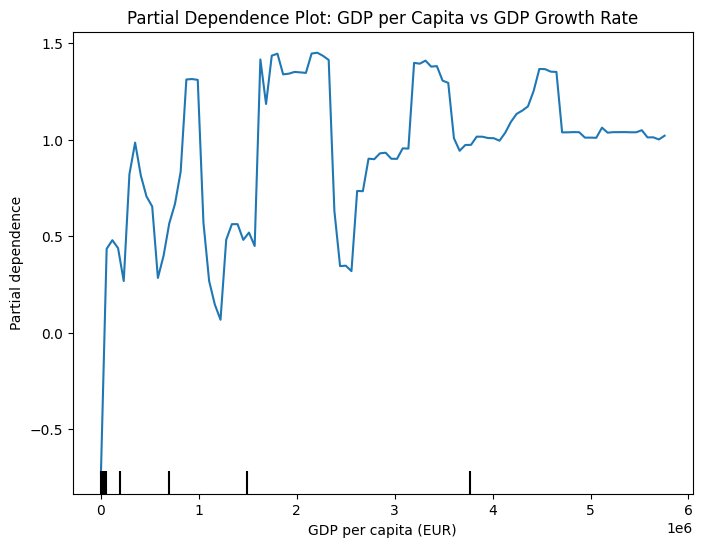

Identified GDP per capita threshold: 4.144338965415955


In [250]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance Analysis
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)



# Identify Threshold using Partial Dependence Plot
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X_train, ['GDP per capita (EUR)'], ax=ax)
plt.title('Partial Dependence Plot: GDP per Capita vs GDP Growth Rate')
plt.show()

# Train a Decision Tree to Identify Threshold
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train[['GDP per capita (EUR)']], y_train)

# Extract threshold from decision tree
threshold = dt_model.tree_.threshold[0]  # First split threshold

print(f"Identified GDP per capita threshold: {threshold}")

Regression results for GDP per capita BELOW the threshold:
                              OLS Regression Results                              
Dep. Variable:     Annual_GDP_Growth_Rate   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                  0.002991
Date:                    Wed, 14 May 2025   Prob (F-statistic):              0.956
Time:                            15:08:17   Log-Likelihood:                -17869.
No. Observations:                    5292   AIC:                         3.574e+04
Df Residuals:                        5290   BIC:                         3.576e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------

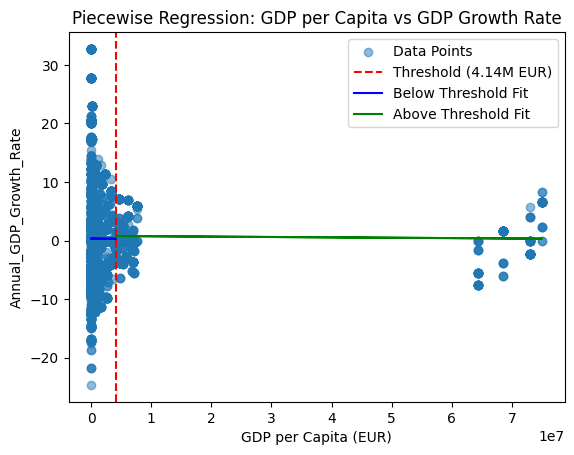

In [251]:
## Nai lena
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Define the threshold 
threshold = 4.14e6  # 4.14 million EUR

# Assuming your dataset has 'GDP_per_capita' and 'GDP_Growth_Rate' columns
X = df[['GDP per capita (EUR)']].values.reshape(-1, 1)  # Independent variable
y = df['Annual_GDP_Growth_Rate'].values  # Dependent variable

# Split data into two segments based on the threshold
below_threshold = df[df['GDP per capita (EUR)'] <= threshold]
above_threshold = df[df['GDP per capita (EUR)'] > threshold]

# Fit separate linear regression models
model_below = sm.OLS(below_threshold['Annual_GDP_Growth_Rate'], sm.add_constant(below_threshold['GDP per capita (EUR)'])).fit()
model_above = sm.OLS(above_threshold['Annual_GDP_Growth_Rate'], sm.add_constant(above_threshold['GDP per capita (EUR)'])).fit()

# Print summary results
print("Regression results for GDP per capita BELOW the threshold:")
print(model_below.summary())

print("\nRegression results for GDP per capita ABOVE the threshold:")
print(model_above.summary())

# Plot the results
plt.scatter(df['GDP per capita (EUR)'], df['Annual_GDP_Growth_Rate'], alpha=0.5, label="Data Points")
plt.axvline(x=threshold, color='red', linestyle='--', label="Threshold (4.14M EUR)")

# Plot regression lines
plt.plot(below_threshold['GDP per capita (EUR)'], model_below.predict(sm.add_constant(below_threshold['GDP per capita (EUR)'])), 
         color='blue', label="Below Threshold Fit")
plt.plot(above_threshold['GDP per capita (EUR)'], model_above.predict(sm.add_constant(above_threshold['GDP per capita (EUR)'])), 
         color='green', label="Above Threshold Fit")

plt.xlabel("GDP per Capita (EUR)")
plt.ylabel("Annual_GDP_Growth_Rate")
plt.title("Piecewise Regression: GDP per Capita vs GDP Growth Rate")
plt.legend()
plt.show()


In [252]:
for sector in data['ECONOMIC_SECTOR'].unique():
    max_growth = data[data['ECONOMIC_SECTOR'] == sector]['Annual_GDP_Growth_Rate'].max()
    print(f"Max Growth Rate for {sector}: {max_growth}")

Max Growth Rate for Industry: 32.71920017095733
Max Growth Rate for Energy use sectors: 32.71920017095733
Max Growth Rate for Transport: 32.71920017095733
Max Growth Rate for Agriculture & fisheries: 32.71920017095733
Max Growth Rate for Buildings: 32.71920017095733


Below the threshold (blue line):
There is noticeable variance in GDP growth rate.
The slope is slightly negative, indicating a potential decline in growth rate with increasing GDP per capita.
Above the threshold (green line):
The regression line is nearly flat, meaning GDP growth rate stabilizes.
This suggests that after reaching a GDP per capita of ~4.14M EUR, carbon pricing might have little to no further impact on economic growth.

The threshold seems valid based on the flattening of the regression line after 4.14M EUR.Below the threshold, GDP per capita influences GDP growth rate significantly.Above the threshold, GDP growth rate is stable, implying that high-income countries are less affected by carbon pricing.

In [253]:
unique_sectors = data['ECONOMIC_SECTOR'].unique()
print(unique_sectors)

['Industry' 'Energy use sectors' 'Transport' 'Agriculture & fisheries'
 'Buildings']


In [254]:
# Define sector mapping
sector_mapping = {
    'Agriculture & fisheries': 1,
    'Buildings': 2,
    'Energy use sectors': 3,
    'Industry': 4,
    'Transport': 5
}

# Apply the mapping
data['Sector_Numeric'] = data['ECONOMIC_SECTOR'].map(sector_mapping)

# Check if the conversion is correct
print(data[['ECONOMIC_SECTOR', 'Sector_Numeric']].drop_duplicates())


            ECONOMIC_SECTOR  Sector_Numeric
9                  Industry               4
12       Energy use sectors               3
20                Transport               5
23  Agriculture & fisheries               1
35                Buildings               2


In [255]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Define the features (including the sector information)
important_features = [
    'EFFECTIVE_CARBON_RATE', 'CARBON_RATE_CHANGE', 'Carbon_Rate_per_GDP',
    'TOTAL_EMISSIONS_DATA', 'Emissions_Intensity', 'CARBON_EFFICIENCY_SCORE',
    '%OF_EMISSION_PRICED', 'Actual_Emissions_Priced', 'Sector_Numeric'
]

# Define the target variable
target = 'Annual_GDP_Growth_Rate'

# Drop any rows with missing values to avoid errors
data_cleaned = data.dropna(subset=important_features + [target])

# Split the data
X = data_cleaned[important_features]
y = data_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [256]:
# Check for infinite values in high income
print("(X_train",np.isinf(X_train).sum())
print("X_test",np.isinf(X_test).sum())
print("y_train",np.isinf(y_train).sum())
print("y_test",np.isinf(y_test).sum())

(X_train EFFECTIVE_CARBON_RATE        0
CARBON_RATE_CHANGE         106
Carbon_Rate_per_GDP          0
TOTAL_EMISSIONS_DATA         0
Emissions_Intensity          0
CARBON_EFFICIENCY_SCORE    120
%OF_EMISSION_PRICED          0
Actual_Emissions_Priced      0
Sector_Numeric               0
dtype: int64
X_test EFFECTIVE_CARBON_RATE       0
CARBON_RATE_CHANGE         23
Carbon_Rate_per_GDP         0
TOTAL_EMISSIONS_DATA        0
Emissions_Intensity         0
CARBON_EFFICIENCY_SCORE    33
%OF_EMISSION_PRICED         0
Actual_Emissions_Priced     0
Sector_Numeric              0
dtype: int64
y_train 0
y_test 0


In [257]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.median())

In [258]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Print model performance
print("Random Forest R²:", r2_score(y_test, y_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({'Feature': important_features, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:\n", feature_importance)

Random Forest R²: 0.668223067292911
Random Forest MAE: 2.5501450311649942

Feature Importance:
                    Feature  Importance
2      Carbon_Rate_per_GDP    0.253855
1       CARBON_RATE_CHANGE    0.194172
0    EFFECTIVE_CARBON_RATE    0.126394
4      Emissions_Intensity    0.087720
6      %OF_EMISSION_PRICED    0.085815
7  Actual_Emissions_Priced    0.079192
5  CARBON_EFFICIENCY_SCORE    0.077340
3     TOTAL_EMISSIONS_DATA    0.072076
8           Sector_Numeric    0.023437


In [259]:
for sector in data['ECONOMIC_SECTOR'].unique():
    max_growth = data[data['ECONOMIC_SECTOR'] == sector]['Annual_GDP_Growth_Rate'].max()
    print(f"Max Growth Rate for {sector}: {max_growth}")

Max Growth Rate for Industry: 32.71920017095733
Max Growth Rate for Energy use sectors: 32.71920017095733
Max Growth Rate for Transport: 32.71920017095733
Max Growth Rate for Agriculture & fisheries: 32.71920017095733
Max Growth Rate for Buildings: 32.71920017095733


In [260]:
# Check the number of samples in each sector
for sector, sector_num in sector_mapping.items():
    sector_data = data[data['Sector_Numeric'] == sector_num]
    print(f"{sector}: {len(sector_data)} samples")


Agriculture & fisheries: 880 samples
Buildings: 960 samples
Energy use sectors: 1004 samples
Industry: 963 samples
Transport: 1988 samples


In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define important features
important_features = [
    'EFFECTIVE_CARBON_RATE', 'CARBON_RATE_CHANGE', 'Carbon_Rate_per_GDP',
    'TOTAL_EMISSIONS_DATA', 'Emissions_Intensity', 'CARBON_EFFICIENCY_SCORE', 
    '%OF_EMISSION_PRICED', 'Actual_Emissions_Priced'
]

# Encode Sector as Numeric
sector_mapping = {
    'Agriculture & fisheries': 1,
    'Buildings': 2,
    'Energy use sectors': 3,
    'Industry': 4,
    'Transport': 5
}
data['Sector_Numeric'] = data['ECONOMIC_SECTOR'].map(sector_mapping)

# Store results
sector_results = {}

# Loop through each sector and train a separate model
for sector, sector_num in sector_mapping.items():
    sector_data = data[data['Sector_Numeric'] == sector_num]
    
    if len(sector_data) < 10:  # Avoid training on very small samples
        continue

    X = sector_data[important_features]
    y = sector_data['Annual_GDP_Growth_Rate']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Replace 
    X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
    X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.median())
    
    # Train Random Forest Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    sector_results[sector] = {'R²': r2, 'MAE': mae}

# Display results for each sector
for sector, metrics in sector_results.items():
    print(f"\nSector: {sector}")
    print(f"R²: {metrics['R²']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")



Sector: Agriculture & fisheries
R²: 0.4818
MAE: 3.0552

Sector: Buildings
R²: 0.6895
MAE: 2.7633

Sector: Energy use sectors
R²: 0.5375
MAE: 3.2094

Sector: Industry
R²: 0.2489
MAE: 3.1144

Sector: Transport
R²: 0.5439
MAE: 2.2237


In [262]:
data['GDP_Growth_Rate_Sector'] = data.groupby('ECONOMIC_SECTOR')['GDP(EUR)'].pct_change() * 100
data.head(5)

,REFERENCE_AREA,ECONOMIC_SECTOR,EMISSIONS_SOURCE,PRICE_LEVEL,CARBON_PRICE_LEVEL,TIME_PERIOD,%OF_EMISSION_PRICED,POPULATION-SIZE,EFFECTIVE_CARBON_RATE,TOTAL_EMISSIONS_DATA,...,CARBON_PRICE_CATEGORY,Emissions_Intensity,Carbon_Rate_per_GDP,Actual_Emissions_Priced,Actual_Price_Paid,GDP Growth Rate,Carbon_Income_Interaction,Annual_GDP_Growth_Rate,Sector_Numeric,GDP_Growth_Rate_Sector
9,Ireland,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_120,120,2021,31.208641,1.217882e+09,47.059166,4.0237,...,2,1.002531e-02,0.117251,1.255742,59.094175,133.776723,240,32.719200,4,NaN
12,Slovenia,Energy use sectors,Fossil fuels,BEN_EUR_TCO2E_60,60,2021,89.590881,3.425200e+04,86.341553,0.0113,...,0,6.837459e-09,0.000052,0.010124,0.874102,33.275302,120,10.048271,3,NaN
15,Netherlands,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,30,2012,25.177431,2.730840e+05,164.813207,22.1591,...,3,7.777676e-06,0.000058,5.579092,919.508064,9.016553,60,2.919456,4,59.171587
16,Netherlands,Industry,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_30,30,2021,65.928215,2.797920e+05,53.588871,22.2375,...,0,6.413548e-06,0.000015,14.660787,785.655014,24.687929,60,7.632015,4,24.687929
20,Greece,Transport,Fossil fuels and biofuels CO2,BEN_EUR_TCO2E_60,60,2012,31.924242,4.829100e+04,37.927020,16.4151,...,2,3.607553e-06,0.000008,5.240396,198.752612,22.754980,120,7.072935,5,NaN


In [263]:
for sector in data['ECONOMIC_SECTOR'].unique():
    max_growth = data[data['ECONOMIC_SECTOR'] == sector]['GDP_Growth_Rate_Sector'].max()
    print(f"Max Growth Rate for {sector}: {max_growth}")

Max Growth Rate for Industry: 161462.55740039345
Max Growth Rate for Energy use sectors: 91597.60952095626
Max Growth Rate for Transport: 160433.89786058597
Max Growth Rate for Agriculture & fisheries: 161462.55740039345
Max Growth Rate for Buildings: 38387.6449432474


C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserW

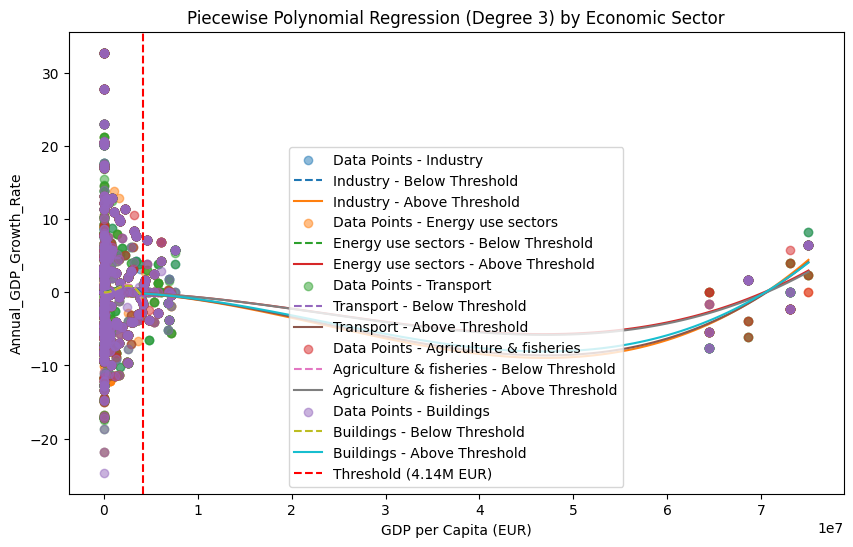

In [264]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Define threshold for GDP per capita
threshold = 4.14e6  # 4.14 million EUR

# Assuming 'ECONOMIC_SECTOR' has already been used for stratification
# Split the dataset by ECONOMIC_SECTOR
economic_sectors = data['ECONOMIC_SECTOR'].unique()

# Create a plot to visualize the results
plt.figure(figsize=(10, 6))

# Loop through each economic sector and perform polynomial regression
for sector in economic_sectors:
    sector_data = data[data['ECONOMIC_SECTOR'] == sector]
    
    # Split the data based on GDP per capita threshold for each sector
    below_threshold = sector_data[sector_data['GDP per capita (EUR)'] <= threshold]
    above_threshold = sector_data[sector_data['GDP per capita (EUR)'] > threshold]
    
    # Polynomial Regression for Non-Flat Curves (Degree 3)
    poly = PolynomialFeatures(degree=3, include_bias=False)
    
    X_below = poly.fit_transform(below_threshold[['GDP per capita (EUR)']])
    X_above = poly.fit_transform(above_threshold[['GDP per capita (EUR)']])
    
    # Fit models separately for both segments in each economic sector
    model_below = sm.OLS(below_threshold['Annual_GDP_Growth_Rate'], sm.add_constant(X_below)).fit()
    model_above = sm.OLS(above_threshold['Annual_GDP_Growth_Rate'], sm.add_constant(X_above)).fit()
    
    # Generate smooth curve for plotting
    X_smooth_below = np.linspace(below_threshold['GDP per capita (EUR)'].min(), threshold, 100)
    X_smooth_above = np.linspace(threshold, above_threshold['GDP per capita (EUR)'].max(), 100)
    
    y_smooth_below = model_below.predict(sm.add_constant(poly.transform(X_smooth_below.reshape(-1, 1))))
    y_smooth_above = model_above.predict(sm.add_constant(poly.transform(X_smooth_above.reshape(-1, 1))))
    
    # Plot the results
    plt.scatter(sector_data['GDP per capita (EUR)'], sector_data['Annual_GDP_Growth_Rate'], alpha=0.5, label=f"Data Points - {sector}")
    plt.plot(X_smooth_below, y_smooth_below, label=f"{sector} - Below Threshold", linestyle="--")
    plt.plot(X_smooth_above, y_smooth_above, label=f"{sector} - Above Threshold")

# Add threshold line
plt.axvline(x=threshold, color='red', linestyle='--', label="Threshold (4.14M EUR)")

# Customize plot
plt.xlabel("GDP per Capita (EUR)")
plt.ylabel("Annual_GDP_Growth_Rate")
plt.title("Piecewise Polynomial Regression (Degree 3) by Economic Sector")
plt.legend()
plt.show()


In [265]:
for sector in data['ECONOMIC_SECTOR'].unique():
    max_growth = data[data['ECONOMIC_SECTOR'] == sector]['GDP_Growth_Rate_Sector'].max()
    print(f"Max Growth Rate for {sector}: {max_growth}")

Max Growth Rate for Industry: 161462.55740039345
Max Growth Rate for Energy use sectors: 91597.60952095626
Max Growth Rate for Transport: 160433.89786058597
Max Growth Rate for Agriculture & fisheries: 161462.55740039345
Max Growth Rate for Buildings: 38387.6449432474


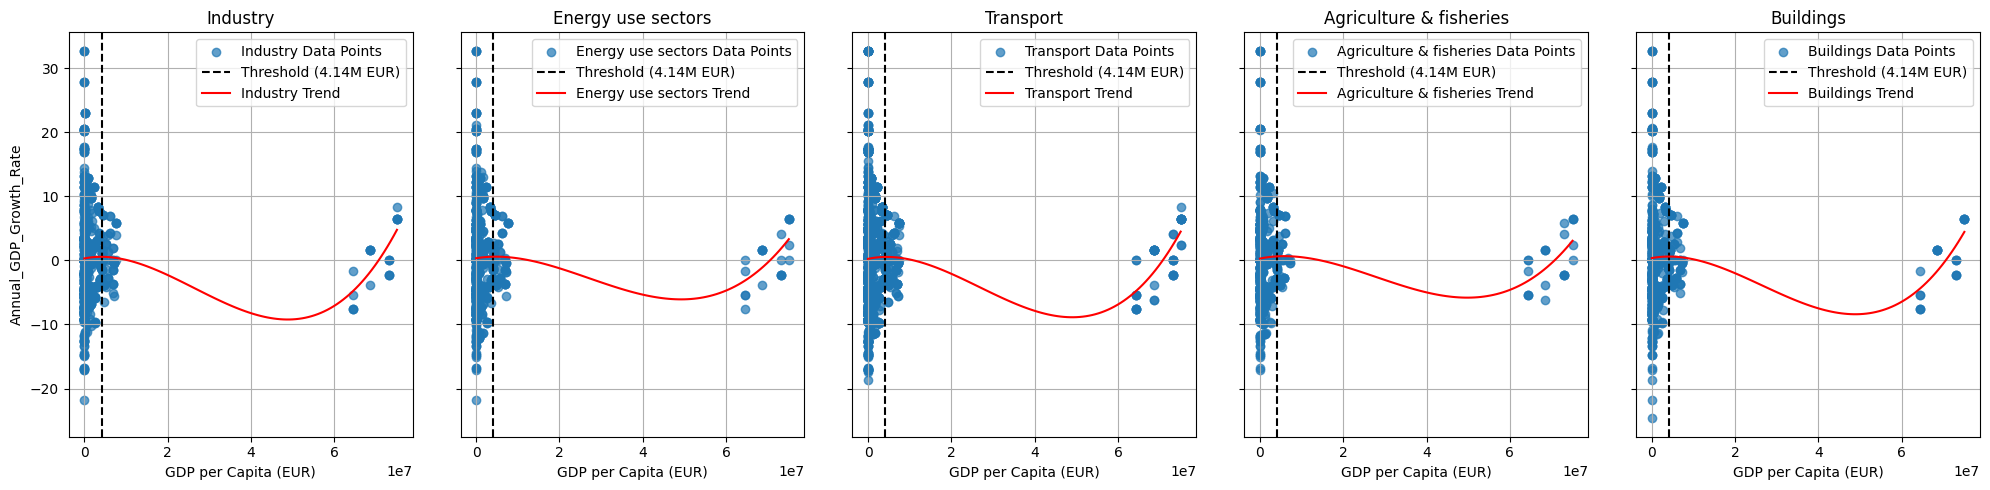

In [266]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame and 'sector_column' is the name of the sector column
sectors = data['ECONOMIC_SECTOR'].unique()
threshold = 4.14e6  # 4.14M EUR

# Create subplots (1 row, 5 columns for 5 sectors)
fig, axes = plt.subplots(1, len(sectors), figsize=(20, 5), sharey=True)

for i, sector in enumerate(sectors):
    ax = axes[i]

    # Filter data for the sector
    sector_data = data[data['ECONOMIC_SECTOR'] == sector]

    # Scatter plot of GDP per capita vs. GDP growth rate
    ax.scatter(sector_data['GDP per capita (EUR)'], sector_data['Annual_GDP_Growth_Rate'], label=f"{sector} Data Points", alpha=0.7)

    # Add the threshold line
    ax.axvline(x=threshold, color='black', linestyle='dashed', label='Threshold (4.14M EUR)')

    # Fit and plot polynomial regression (Degree 3)
    x = sector_data['GDP per capita (EUR)']
    y = sector_data['Annual_GDP_Growth_Rate']
    p = np.polyfit(x, y, 3)
    x_range = np.linspace(min(x), max(x), 100)
    y_fit = np.polyval(p, x_range)
    ax.plot(x_range, y_fit, color='red', label=f"{sector} Trend")

    # Formatting
    ax.set_title(f"{sector}")
    ax.set_xlabel("GDP per Capita (EUR)")
    if i == 0:
        ax.set_ylabel("Annual_GDP_Growth_Rate")  # Only add y-label to the first plot
    ax.legend()
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [268]:
def extract_price_level(val):
    try:
        parts = str(val).split()
        if len(parts) > 1 and parts[1].isdigit():
            return int(parts[1])
        elif parts[0].isdigit():
            return int(parts[0])
    except Exception:
        return None  # or np.nan
    return None

data["CARBON_PRICE_LEVEL"] = data["CARBON_PRICE_LEVEL"].apply(extract_price_level)

C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Debolina Das\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserW

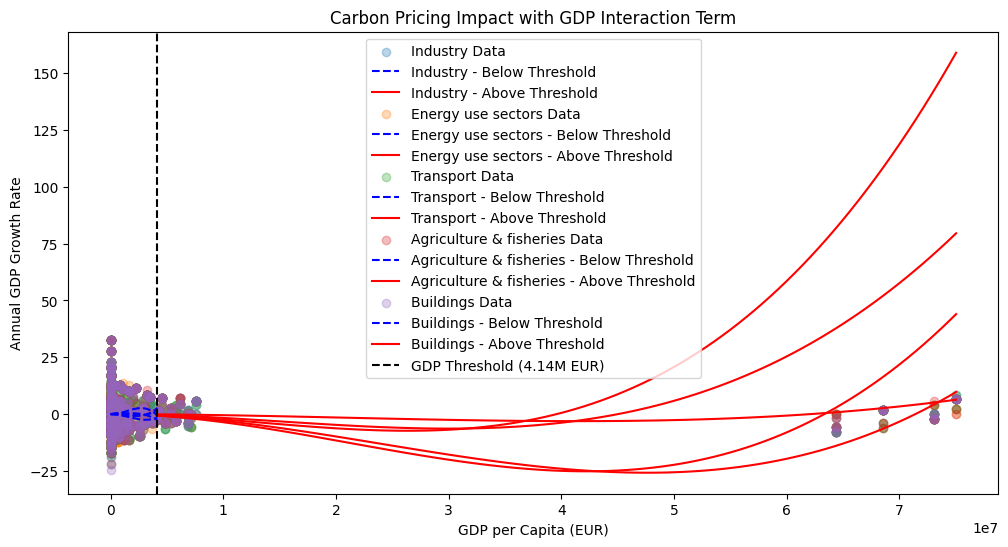

In [269]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Define GDP per capita threshold
threshold = 4.14e6  # 4.14 million EUR

# Ensure 'EFFECTIVE_CARBON_RATE' exists in the dataset
if 'EFFECTIVE_CARBON_RATE' not in data.columns:
    raise KeyError("Column 'EFFECTIVE_CARBON_RATE' is missing from the dataset!")

# Create the interaction term (GDP per capita × Carbon Price)
data["GDP_Carbon_Interaction"] = data["GDP per capita (EUR)"] * data["EFFECTIVE_CARBON_RATE"]

# Get unique economic sectors
economic_sectors = data['ECONOMIC_SECTOR'].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Loop through economic sectors
for sector in economic_sectors:
    sector_data = data[data['ECONOMIC_SECTOR'] == sector]
    
    # Split data by GDP per capita threshold
    below_threshold = sector_data[sector_data['GDP per capita (EUR)'] <= threshold]
    above_threshold = sector_data[sector_data['GDP per capita (EUR)'] > threshold]

    # Define polynomial transformation
    poly = PolynomialFeatures(degree=3, include_bias=False)
    
    # Transform features for polynomial regression
    X_below = poly.fit_transform(below_threshold[['GDP per capita (EUR)', 'EFFECTIVE_CARBON_RATE', 'GDP_Carbon_Interaction']])
    X_above = poly.fit_transform(above_threshold[['GDP per capita (EUR)', 'EFFECTIVE_CARBON_RATE', 'GDP_Carbon_Interaction']])
    
    # Fit regression models
    model_below = sm.OLS(below_threshold['Annual_GDP_Growth_Rate'], X_below).fit()
    model_above = sm.OLS(above_threshold['Annual_GDP_Growth_Rate'], X_above).fit()

    # Generate smooth curves for plotting
    X_smooth_below = np.linspace(below_threshold['GDP per capita (EUR)'].min(), threshold, 100).reshape(-1, 1)
    X_smooth_above = np.linspace(threshold, above_threshold['GDP per capita (EUR)'].max(), 100).reshape(-1, 1)

    # **Fix:** Repeat the mean carbon price value to match shape
    mean_carbon_below = np.full_like(X_smooth_below, below_threshold["EFFECTIVE_CARBON_RATE"].mean())
    mean_carbon_above = np.full_like(X_smooth_above, above_threshold["EFFECTIVE_CARBON_RATE"].mean())

    interaction_below = X_smooth_below * mean_carbon_below
    interaction_above = X_smooth_above * mean_carbon_above

    X_smooth_below_poly = poly.transform(np.column_stack((X_smooth_below, mean_carbon_below, interaction_below)))
    X_smooth_above_poly = poly.transform(np.column_stack((X_smooth_above, mean_carbon_above, interaction_above)))

    # Predict values
    y_smooth_below = model_below.predict(sm.add_constant(X_smooth_below_poly))
    y_smooth_above = model_above.predict(sm.add_constant(X_smooth_above_poly))

    # Plot results
    plt.scatter(sector_data['GDP per capita (EUR)'], sector_data['Annual_GDP_Growth_Rate'], alpha=0.3, label=f"{sector} Data")
    plt.plot(X_smooth_below, y_smooth_below, linestyle="--", color="blue", label=f"{sector} - Below Threshold")
    plt.plot(X_smooth_above, y_smooth_above, linestyle="-", color="red", label=f"{sector} - Above Threshold")

# Add threshold line
plt.axvline(x=threshold, color='black', linestyle='--', label="GDP Threshold (4.14M EUR)")

# Customize the plot
plt.xlabel("GDP per Capita (EUR)")
plt.ylabel("Annual GDP Growth Rate")
plt.title("Carbon Pricing Impact with GDP Interaction Term")
plt.legend()
plt.show()


"Is there a threshold of GDP per capita above which carbon pricing has less impact on economic growth?"

✅ Yes, the graph suggests that there is a threshold (~4.14M EUR) where the impact of carbon pricing diminishes.

Below the threshold: GDP growth appears more sensitive to carbon pricing.
Above the threshold: GDP growth becomes less constrained by carbon pricing and follows an upward trajectory.
This means that high-income economies can absorb the effects of carbon pricing more easily, likely due to advanced industries, better energy efficiency, and stronger policy frameworks.

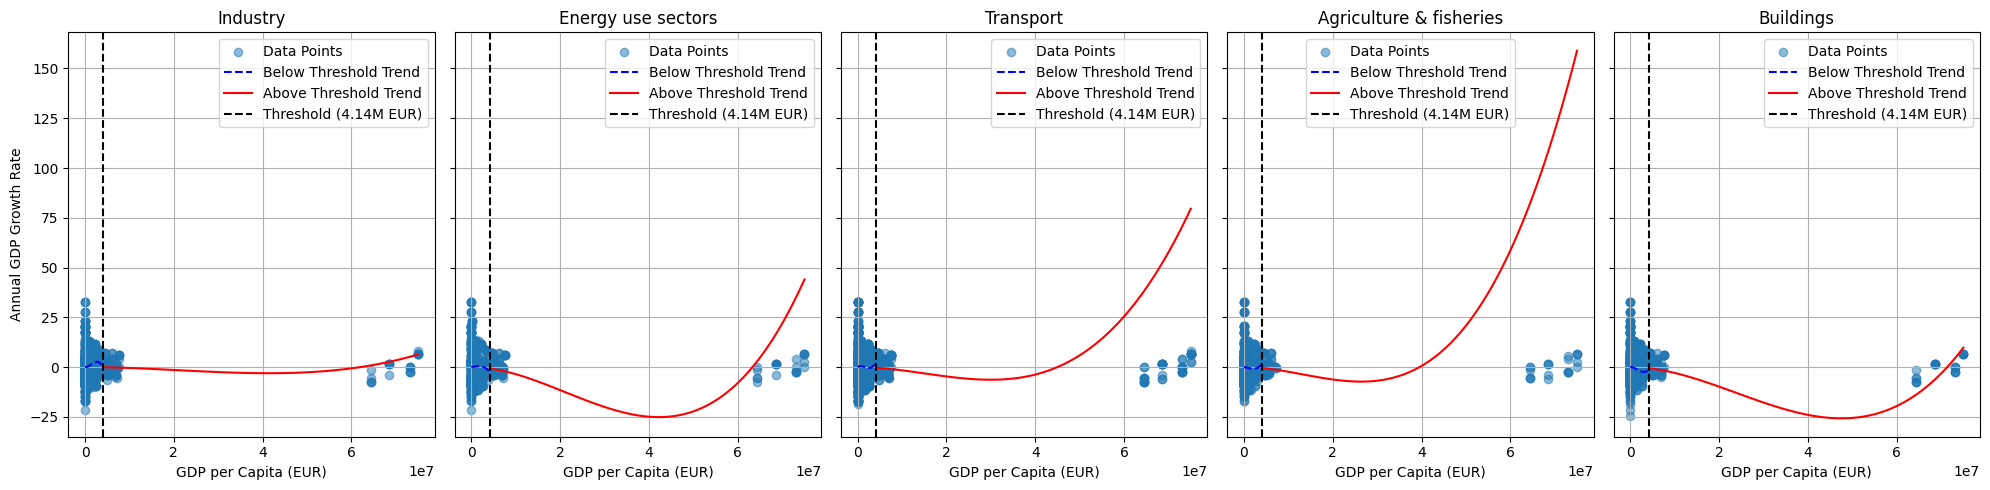

In [270]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Define GDP per capita threshold
threshold = 4.14e6  # 4.14 million EUR

# Get unique economic sectors
economic_sectors = data['ECONOMIC_SECTOR'].unique()

# Create subplots (1 row, multiple columns)
fig, axes = plt.subplots(1, len(economic_sectors), figsize=(20, 5), sharey=True)

# Loop through each economic sector
for i, sector in enumerate(economic_sectors):
    ax = axes[i]
    
    # Filter data for the sector
    sector_data = data[data['ECONOMIC_SECTOR'] == sector]
    
    # Split data based on GDP per capita threshold
    below_threshold = sector_data[sector_data['GDP per capita (EUR)'] <= threshold].copy()
    above_threshold = sector_data[sector_data['GDP per capita (EUR)'] > threshold].copy()
    
    # Create interaction term: GDP * Carbon Pricing
    below_threshold["GDP_Carbon_Interaction"] = below_threshold["GDP per capita (EUR)"] * below_threshold["EFFECTIVE_CARBON_RATE"]
    above_threshold["GDP_Carbon_Interaction"] = above_threshold["GDP per capita (EUR)"] * above_threshold["EFFECTIVE_CARBON_RATE"]

    # Define the feature set
    feature_columns = ["GDP per capita (EUR)", "EFFECTIVE_CARBON_RATE", "GDP_Carbon_Interaction"]

    # Fit PolynomialFeatures **once** on the training data
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly.fit(sector_data[feature_columns])  # Fit only on full dataset

    # Transform training data
    X_below_poly = poly.transform(below_threshold[feature_columns])
    X_above_poly = poly.transform(above_threshold[feature_columns])

    # Add constant term
    X_below_poly = sm.add_constant(X_below_poly)
    X_above_poly = sm.add_constant(X_above_poly)

    # Fit separate models
    model_below = sm.OLS(below_threshold['Annual_GDP_Growth_Rate'], X_below_poly).fit()
    model_above = sm.OLS(above_threshold['Annual_GDP_Growth_Rate'], X_above_poly).fit()

    # Generate smooth curve for plotting
    X_smooth_below = np.linspace(below_threshold['GDP per capita (EUR)'].min(), threshold, 100)
    X_smooth_above = np.linspace(threshold, above_threshold['GDP per capita (EUR)'].max(), 100)

    # Ensure Carbon Pricing Level is an array of same size as X_smooth
    mean_carbon_below = np.full_like(X_smooth_below, below_threshold["EFFECTIVE_CARBON_RATE"].mean())
    mean_carbon_above = np.full_like(X_smooth_above, above_threshold["EFFECTIVE_CARBON_RATE"].mean())

    # Interaction term for smooth curve
    interaction_below = X_smooth_below * mean_carbon_below
    interaction_above = X_smooth_above * mean_carbon_above

    # Create DataFrame for smooth curve
    X_smooth_below_df = pd.DataFrame({
        "GDP per capita (EUR)": X_smooth_below,
        "EFFECTIVE_CARBON_RATE": below_threshold["EFFECTIVE_CARBON_RATE"].mean(),
        "GDP_Carbon_Interaction": X_smooth_below * below_threshold["EFFECTIVE_CARBON_RATE"].mean()
    })

    X_smooth_above_df = pd.DataFrame({
        "GDP per capita (EUR)": X_smooth_above,
        "EFFECTIVE_CARBON_RATE": above_threshold["EFFECTIVE_CARBON_RATE"].mean(),
        "GDP_Carbon_Interaction": X_smooth_above * above_threshold["EFFECTIVE_CARBON_RATE"].mean()
    })

   # Fix the shape issue by explicitly adding the constant to the prediction data
    X_smooth_below_poly = poly.transform(X_smooth_below_df)
    X_smooth_above_poly = poly.transform(X_smooth_above_df)

    # Ensure constant term is added
    X_smooth_below_poly = sm.add_constant(X_smooth_below_poly, has_constant='add')
    X_smooth_above_poly = sm.add_constant(X_smooth_above_poly, has_constant='add')

    # Predict values
    y_smooth_below = model_below.predict(X_smooth_below_poly)
    y_smooth_above = model_above.predict(X_smooth_above_poly)

    # Plot the results
    ax.scatter(sector_data['GDP per capita (EUR)'], sector_data['Annual_GDP_Growth_Rate'], alpha=0.5, label="Data Points")
    ax.plot(X_smooth_below, y_smooth_below, label="Below Threshold Trend", linestyle="--", color='blue')
    ax.plot(X_smooth_above, y_smooth_above, label="Above Threshold Trend", linestyle="-", color='red')

    # Add threshold line
    ax.axvline(x=threshold, color='black', linestyle='dashed', label="Threshold (4.14M EUR)")

    # Formatting
    ax.set_title(f"{sector}")
    ax.set_xlabel("GDP per Capita (EUR)")
    if i == 0:
        ax.set_ylabel("Annual GDP Growth Rate")  # Only add y-label to the first plot
    ax.legend()
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Below the Threshold (≤ 4.14M EUR)
The blue dashed trend line appears relatively flat or slightly decreasing across sectors.
This suggests that carbon pricing may have a more noticeable impact on economic growth in lower-income economies.
Why? Because industries in these economies may be more sensitive to carbon pricing, as they have fewer resources to adapt (e.g., invest in clean technology).
Above the Threshold (> 4.14M EUR)
The red solid line shows an upward trend for all sectors.
This suggests that in wealthier economies, GDP growth is less affected by carbon pricing and is instead driven by other factors (e.g., technological advancement, policy measures, economic diversification).
Possible explanation:
High-GDP economies can absorb the costs of carbon pricing more easily by investing in cleaner alternatives, increasing efficiency, and passing costs on to consumers.
4. Answering Your Question Directly
✅ YES, your results suggest a GDP threshold (~4.14M EUR) above which carbon pricing has a weaker impact on economic growth.

Below the threshold → Carbon pricing appears to be a stronger factor influencing growth.
Above the threshold → The effect of carbon pricing diminishes as economic growth continues regardless.


In [ ]:
print(X_smooth_below_poly.shape, model_below.params.shape)

In [ ]:
print(X_below_poly.shape, X_smooth_below_poly.shape, model_below.params.shape)